# 3. Feature Extraction, Transformations and Cleansing: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
%matplotlib inline
matplotlib.style.use("ggplot")

In [2]:
pd.set_option('display.max_columns', None)

## 3.1. Data Quality: nans, wrong data, etc.

### File loading and examine:

### 1. Vamos a utilizar los data sets desde el 2000 hasta el 2014. Creamos un algoritmo que sea capaz de cargar y concatenar todos los archivos a la vez, previo a  empezar la limpieza

In [3]:
import glob

In [4]:
path =r'../tennis_atp-master/Prueba' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
frame = pd.concat(list_)

### 2. Ahora aplico el proceso de limpieza que hemos dictaminado como necesario:

In [5]:
# 1. Take out matchs from Davies Cup:
framesD = frame[frame['tourney_level'] != 'D']
# 2. Take out matchs from Challenge CUP:
framesDC = framesD[framesD['tourney_level'] != 'C']
# 3.1. Take out marchs'W/O' (Walk Over):
framesDCWO = framesDC[framesDC['score'] != 'W/O']
# 3.2. Take out marchs' W/O' (Walk Over):
framesDCWO = framesDCWO[framesDCWO['score'] != ' W/O']
# 4. Take out matchs with high volume of NaNs:
framesDCWO2 = framesDCWO.dropna(axis=0, thresh=30)

In [6]:
x = frame.shape
y = framesDCWO2.shape
print x
print y

(53120, 49)
(47085, 49)


La limpieza ha supuesto la eliminacion de 5.425 partidos, un 11,5% del total.

### 3. Ahora vamos a analizar variables predictores:
    Cada linea del dataset contiene un partido, cada partido contiene 49 features que describen el torneo, los jugadores y las estadisticas de juego. De cara a modelizar este dataset tenemos que tener en cuenta que hay variables que no van a poder set utilizadas como variables explicativas, bien porque no esten disponibles antes del partido (ej. result, aces, etc.) o bien porque sean variables descriptivas (ej. date, name of the winner, etc.).
    Vamos a utilizar modelos de clasificacion en los que el resultado va a ser 1 gana el jugador A, 0 pierde el jugador A.
    Al tener variables de ambos jugadores podriamos elegir utilizar ambas o hacer una nueva feature con la diferencia entre ellas. Si utilizamos esta segunada visión cualquier partido podría tener un target de 1 o 0 en función de que jugador se ponga primero al hacer un estadístico, por tanto podemos decir que el modelo sería simetrico.
    A continuación vamos a analizar los tipos de variables:
   

#### a) Features constantes:
    Se mantienen constantes en cualquier partido
    1. Hand: Puede ser R o L. Vamos a convertirla en una variable categorica en la que 1 sera R y 0 sera L
    2. Best of: Numero de sets del partido, 3 o 5. Vamos a convertirla en una variable categoriaca en la que 1 sea 3 sets y 0 serán 5 sets.
    3. Height: Puede cambiar en el caso de jugadores muy jovenes, sin embargo, con objeto de simplificar el modelo la mantendremos constante.
    
#### b) Features variables, disponibles en cada partido:
    1. Age: 
    2. Rank/Rank points:
    3. Odds: Esta variable supone una de las claves del proyecto. Originalmente el objetivo de este era construir un modelo de ML que optimizara el ROI de nuestras apuestas. Para optimizar este resultado no solo es necesario tener un indice de acierto importante sino ademas tener en cuenta el retorno de cada acierto o perdida en caso de error. Por tanto para llevar a cabo este objetivo necesitariamos cambiar la funcion de coste de nuestro modelo incluyendo la variable odd. Es decir, la función de coste tiene que maximizar nuestras ganancias. Nuestra funcion de coste seria:
    
    J(w) = 1/2 E
    
    El objetivo de nuestro algoritmo es minimizar la función de coste al maximo. Si el resultado de la función de coste fuese 0 esto supondría que nuestra hipotesis h(x) obtiene la maxima rentabilidad posible.
    
    Dicho de otra manera si en un modelo normal la función de coste para minimizar la distancia suele ser el método de los minimos cuadrados, en este caso habría que ponderar esas distancias con la cantidad a recibir o a perder. 
    
    Para minimizar la función de coste podemos usar diferentes metodos:
    - Algoritmo de descenso del gradiente
    - Algoritmos de optimizacion avanzada
    
    Sin embargo dada la complejidad de este asunto, en este trabajo simplemente la utilizaremos como una variable descriptiva más, siendo el objetivo maximar el % de acierto.
    
#### c)Features variables, no disponibles en cada partido (requieren iteraciones):
    1. Average Minutes por partido
    2. Average Aces por partido
    3. Average Double Faults por partido
    4. % First In (w_1stIn/w_svpt)
    5. % First Won (w_1stWon / w_1stIn)
    6. % Second Won (w_2ndWon / (w_svpt - w_1stIn)) - Crear un estadistico de w_2ndIn
    7. % Break point won ( w_bpSaved / w_bpFaced)

    Hay que tener en cuenta que los partidos tienen una duración bien diferenciada según el torneo. Pueden ser torneos a 5 sets o a 3 sets, por tanto es necesario que separe el data set en dos para poder realizar los estadísticos y luego volver a juntarlo

#### d) Features varibles, no disponibles en cada partido (requieren iteraciones muy complejas)
    1. % Victorias en los ultimos 5 partidos
    2. % Victoria Head to Head
    3. % Victorias en los ultimos partidos Head to Head
    4. Surface: No utilizaremos esta variable como tal sino que vamos a poner el % de victorias sobre esa superfice (tendremos que implementar una iteración que busque el % partidos ganados sobre la superficie en que se juegue el partido)
    5. Tourney Level: No utilizaremos esta variable como tal sino que vamos a poner el % de victorias sobre esa superfice (tendremos que implementar una iteración que busque el % partidos ganados sobre la superficie en que se juegue el partido)
    
    Por tanto vamos a disponer de 18 features para poder modelizar.
    Crearemos ademas un variable Retires que utilizaremos para el problema de modelizacion del fraude, pero esto es algo aparte, como un segundo trabajo.

Voy a empezar limpiando el data set de todos aquellos campos que no vamos a utilizar

In [7]:
columns = ['winner_seed', 'loser_seed', 'winner_entry', 'loser_entry']
framesDCWO2.drop(columns, inplace=True, axis=1) 

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [8]:
framesDCWO2.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,2000-717,Orlando,Clay,32,A,20000501,1,102179,Antony Dupuis,R,185.0,FRA,27.181383,113.0,351.0,102776,Andrew Ilie,R,180.0,AUS,24.035592,50.0,762.0,3-6 7-6(6) 7-6(4),3,R32,162.0,8.0,1.0,126.0,76.0,56.0,29.0,16.0,14.0,15.0,13.0,4.0,110.0,59.0,49.0,31.0,17.0,4.0,4.0
1,2000-717,Orlando,Clay,32,A,20000501,2,103602,Fernando Gonzalez,R,183.0,CHI,19.756331,352.0,76.0,102821,Cecil Mamiit,R,173.0,PHI,23.843943,139.0,280.0,6-2 7-5,3,R32,86.0,4.0,2.0,67.0,35.0,25.0,16.0,10.0,4.0,6.0,0.0,0.0,57.0,24.0,13.0,17.0,10.0,4.0,9.0
2,2000-717,Orlando,Clay,32,A,20000501,3,103387,Paradorn Srichaphan,R,185.0,THA,20.881588,103.0,380.0,102205,Sebastien Lareau,R,183.0,CAN,27.011636,133.0,293.0,6-1 6-3,3,R32,64.0,4.0,1.0,46.0,29.0,23.0,11.0,8.0,0.0,0.0,2.0,2.0,65.0,39.0,22.0,10.0,8.0,6.0,10.0
3,2000-717,Orlando,Clay,32,A,20000501,4,101733,Jan Siemerink,L,183.0,NED,30.047912,107.0,371.0,102925,Justin Gimelstob,R,196.0,USA,23.260780,95.0,408.0,4-6 6-2 7-5,3,R32,150.0,8.0,6.0,109.0,56.0,43.0,21.0,15.0,9.0,12.0,4.0,6.0,104.0,57.0,35.0,24.0,15.0,6.0,11.0
4,2000-717,Orlando,Clay,32,A,20000501,5,101727,Jason Stoltenberg,R,185.0,AUS,30.075291,74.0,543.0,101826,Alex Lopez Moron,R,175.0,ESP,29.423682,111.0,357.0,6-1 6-4,3,R32,60.0,3.0,0.0,50.0,27.0,22.0,16.0,9.0,1.0,1.0,0.0,3.0,47.0,28.0,17.0,10.0,8.0,3.0,6.0


In [9]:
framesDCWO2.shape

(47085, 45)

### 4. New Feature creation: Retired. This feature contemple aquellos partidos que no terminaron

In [10]:
Retired = []
for row in framesDCWO2['score']:
    if 'RET' in row:
        # Append 1
        Retired.append(1)
    # else, if not append 0,
    else:
        Retired.append(0)
# Create a column from the list
framesDCWO2['Retired'] = Retired

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
Ret = framesDCWO2[framesDCWO2['Retired'] == 1 ]
Ret.shape

(1498, 46)

In [12]:
print "El data set tiene %d partidos no terminados por Retirada sobre un total de %d" %(len(Ret.index),
                                                                                        len(framesDCWO2.index))

El data set tiene 1498 partidos no terminados por Retirada sobre un total de 47085


#### Clasificados como Retired hay 1.498 partidos, lo que supone un 3,2%. Sabemos que hay algunos más que no han sido clasificados como Retired y que tendremos que buscar mas adelante (partido dura menos sets de los programados)

### 5. New feature creation: Hand (1 - Right hand, 0 - Left Hand)

In [13]:
Hand = {'R': 1,'L': 0}

In [14]:
framesDCWO2["w_hand"] = np.nan
framesDCWO2["l_hand"] = np.nan

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [15]:
framesDCWO2['w_hand'] = framesDCWO2['w_hand'].fillna(framesDCWO2['winner_hand'].map(Hand))
framesDCWO2['l_hand'] = framesDCWO2['l_hand'].fillna(framesDCWO2['loser_hand'].map(Hand))

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [16]:
framesDCWO2.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,Retired,w_hand,l_hand
0,2000-717,Orlando,Clay,32,A,20000501,1,102179,Antony Dupuis,R,185.0,FRA,27.181383,113.0,351.0,102776,Andrew Ilie,R,180.0,AUS,24.035592,50.0,762.0,3-6 7-6(6) 7-6(4),3,R32,162.0,8.0,1.0,126.0,76.0,56.0,29.0,16.0,14.0,15.0,13.0,4.0,110.0,59.0,49.0,31.0,17.0,4.0,4.0,0,1.0,1.0
1,2000-717,Orlando,Clay,32,A,20000501,2,103602,Fernando Gonzalez,R,183.0,CHI,19.756331,352.0,76.0,102821,Cecil Mamiit,R,173.0,PHI,23.843943,139.0,280.0,6-2 7-5,3,R32,86.0,4.0,2.0,67.0,35.0,25.0,16.0,10.0,4.0,6.0,0.0,0.0,57.0,24.0,13.0,17.0,10.0,4.0,9.0,0,1.0,1.0
2,2000-717,Orlando,Clay,32,A,20000501,3,103387,Paradorn Srichaphan,R,185.0,THA,20.881588,103.0,380.0,102205,Sebastien Lareau,R,183.0,CAN,27.011636,133.0,293.0,6-1 6-3,3,R32,64.0,4.0,1.0,46.0,29.0,23.0,11.0,8.0,0.0,0.0,2.0,2.0,65.0,39.0,22.0,10.0,8.0,6.0,10.0,0,1.0,1.0
3,2000-717,Orlando,Clay,32,A,20000501,4,101733,Jan Siemerink,L,183.0,NED,30.047912,107.0,371.0,102925,Justin Gimelstob,R,196.0,USA,23.260780,95.0,408.0,4-6 6-2 7-5,3,R32,150.0,8.0,6.0,109.0,56.0,43.0,21.0,15.0,9.0,12.0,4.0,6.0,104.0,57.0,35.0,24.0,15.0,6.0,11.0,0,0.0,1.0
4,2000-717,Orlando,Clay,32,A,20000501,5,101727,Jason Stoltenberg,R,185.0,AUS,30.075291,74.0,543.0,101826,Alex Lopez Moron,R,175.0,ESP,29.423682,111.0,357.0,6-1 6-4,3,R32,60.0,3.0,0.0,50.0,27.0,22.0,16.0,9.0,1.0,1.0,0.0,3.0,47.0,28.0,17.0,10.0,8.0,3.0,6.0,0,1.0,1.0


 Voy a crear primero todos los pares de features y no haré las diferencias hasta el final. El motivo es que el dataset siempre esta ordenado con winner loser por tanto si aplicara la formula a-b a todo el dataset la Y siempre sería 1, es decir el resultado sería siempre victoria, y el modelo no funcionaria correctamente.
 
 Para solucionar este problema y poder incluir en el modelo partidos con el target 0, voy a aprovechar la simetría de mi modelo. Dividiré el data set en 2 utilizando la lógica siguiente para cada una de las partes:
 
 1 = winner - loser                  
 0 = - winner + loser

De esta forma voy a obtener un data set con resultados en ambos sentidos

### 6. New feature creation: Best of (1 - 3 sets, 0 - 5 sets)

In [17]:
Sets = {'5': 1,'3': 0}

In [18]:
framesDCWO2['best_of'] = framesDCWO2['best_of'].astype(str)

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [19]:
framesDCWO2['Total_Sets'] = np.nan

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [20]:
framesDCWO2['Total_Sets'] = framesDCWO2['Total_Sets'].fillna(framesDCWO2['best_of'].map(Sets))

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [21]:
framesDCWO2['Total_Sets'] = framesDCWO2['Total_Sets'].astype(int)

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [22]:
framesDCWO2.sample(5)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,Retired,w_hand,l_hand,Total_Sets
1612,2015-807,Acapulco,Hard,32,A,20150223,2,104229,Yen Hsun Lu,R,180.0,TPE,31.529090,61.0,808.0,103607,Victor Estrella,R,173.0,DOM,34.559890,48.0,929.0,6-2 7-5,3,R32,83.0,1.0,2.0,48.0,23.0,19.0,15.0,10.0,0.0,2.0,1.0,3.0,73.0,43.0,26.0,12.0,10.0,6.0,11.0,0,1.0,1.0,0
992,2001-520,Roland Garros,Clay,128,G,20010528,122,103507,Juan Carlos Ferrero,R,183.0,ESP,21.289528,4.0,2830.0,103720,Lleyton Hewitt,R,180.0,AUS,20.254620,6.0,2615.0,6-4 6-2 6-1,5,QF,129.0,5.0,1.0,88.0,61.0,41.0,17.0,12.0,6.0,7.0,2.0,4.0,92.0,57.0,31.0,13.0,13.0,15.0,22.0,0,1.0,1.0,1
813,2014-319,Kitzbuhel,Clay,28,A,20140727,12,106043,Diego Sebastian Schwartzman,R,NaN,ARG,21.946612,100.0,569.0,100644,Alexander Zverev,R,NaN,GER,17.270363,159.0,343.0,6-1 6-0,3,R32,57.0,1.0,1.0,40.0,25.0,15.0,10.0,6.0,3.0,4.0,2.0,3.0,47.0,21.0,4.0,12.0,7.0,5.0,12.0,0,1.0,1.0,0
228,2013-422,Cincinnati Masters,Hard,56,M,20130811,32,105223,Juan Martin Del Potro,R,198.0,ARG,24.884326,7.0,4740.0,103786,Nikolay Davydenko,R,178.0,RUS,32.194387,38.0,1075.0,7-5 7-5,3,R32,102.0,4.0,2.0,64.0,43.0,30.0,11.0,12.0,2.0,5.0,3.0,1.0,81.0,65.0,34.0,7.0,12.0,4.0,9.0,0,1.0,1.0,0
1806,2005-540,Wimbledon,Grass,128,G,20050620,110,103206,Sebastien Grosjean,R,175.0,FRA,27.060917,27.0,1215.0,104925,Novak Djokovic,R,188.0,SRB,18.080767,128.0,337.0,7-5 6-4 5-7 6-4,5,R32,171.0,7.0,3.0,140.0,79.0,60.0,35.0,22.0,3.0,4.0,6.0,4.0,126.0,88.0,66.0,21.0,22.0,6.0,9.0,0,1.0,1.0,1


### 7. Solve *_ht (height) problem:

#### Ahora tenemos que hacer un diccionario con todos los *_ht que faltan:

In [23]:
framesDCWO2.isnull().sum()

tourney_id               0
tourney_name             0
surface                  0
draw_size                0
tourney_level            0
tourney_date             0
match_num                0
winner_id                0
winner_name              0
winner_hand              0
winner_ht             1447
winner_ioc               0
winner_age               0
winner_rank            603
winner_rank_points     603
loser_id                 0
loser_name               0
loser_hand               0
loser_ht              2591
loser_ioc                0
loser_age                2
loser_rank             688
loser_rank_points      688
score                    0
best_of                  0
round                    0
minutes               1295
w_ace                    0
w_df                     0
w_svpt                   0
w_1stIn                  0
w_1stWon                 0
w_2ndWon                 0
w_SvGms                  0
w_bpSaved                0
w_bpFaced                0
l_ace                    0
l

In [24]:
w_Names = {'Adrian Cruciat': 185,
 'Alejandro Gonzalez': 191,
 'Aleksandr Nedovyesov': 193,
 'Alexander Zverev': 191,
 'Alexandre Sidorenko': 185,
 'Ante Pavic': 196,
 'Augustin Gensse': 180,
 'Austin Krajicek': 188,
 'Axel Michon': 176,
 'Bastian Knittel': 180,
 'Blaz Rola': 193,
 'Borna Coric': 185,
 'Chris Eaton': 188,
 'Christian Garin': 185,
 'Christian Harrison': 180,
 'Christian Lindell': 193,
 'Chuhan Wang': 188,
 'Daniel Kosakowski': 185,
 'Daniel Munoz De La Nava': 178,
 'Dennis Novikov': 193,
 'Diego Sebastian Schwartzman': 170,
 'Dimitar Kutrovsky': 175,
 'Dominic Thiem': 185,
 'Elias Ymer': 183,
 'Emilio Gomez': 185,
 'Facundo Bagnis': 183,
 'Filip Peliwo': 178,
 'Gianluca Naso': 193,
 'Guido Pella': 185,
 'Guillermo Olaso': 175,
 'Gustavo Marcaccio': 170,
 'Henri Kontinen': 191,
 'Henri Laaksonen': 185,
 'Hiroki Kondo': 178,
 'Hiroki Moriya': 170,
 'Inigo Cervantes Huegun': 183,
 'Ivan Sergeyev': 175,
 'Jamie Baker': 183,
 'Jan Lennard Struff': 196,
 'Jaroslav Pospisil': 178,
 'Jason Kubler': 178,
 'Javier Marti': 185,
 'Jiri Vesely': 198,
 'Joao Sousa': 185,
 'Jonathan Dasnieres De Veigy': 175,
 'Jonathan Marray': 183,
 'Jorge Aguilar': 178,
 'Karen Khachanov': 198,
 'Kyle Edmund': 188,
 'Laurent Recouderc': 178,
 'Leonardo Tavares': 185,
 'Lucas Pouille': 185,
 'Luka Gregorc': 190,
 'Luke Saville': 188,
 'Marco Trungelliti': 180,
 'Martin Alund': 183,
 'Martin Fischer': 180,
 'Marton Fucsovics': 188,
 'Mate Delic': 196,
 'Mate Pavic': 193,
 'Mathieu Rodrigues': 180,
 'Matteo Viola': 185,
 'Maxime Teixeira': 188,
 'Miloslav Mecir': 196,
 'Mirza Basic': 188,
 'Nick Kyrgios': 193,
 'Nikola Milojevic': 188,
 'Nils Langer': 193,
 'Pablo Carreno Busta': 188,
 'Patrik Rosenholm': 178,
 'Pavol Cervenak': 191,
 'Peng Sun': 184,
 'Petar Jelenic': 190,
 'Philip Davydenko': 183,
 'Philipp Oswald': 201,
 'Pierre Hugues Herbert': 188,
 'Pierre Ludovic Duclos': 188,
 'Radu Albot': 175,
 'Rafael Arevalo': 180,
 'Ramkumar Ramanathan': 188,
 'Renzo Olivo': 180,
 'Rhyne Williams': 185,
 'Roberto Bautista Agut': 183,
 'Roberto Carballes Baena': 180,
 'Ruben Bemelmans': 183,
 'Samuel Groth': 193,
 'Sebastian Rieschick': 188,
 'Sergei Bubka': 188,
 'Takahiro Terachi': 174,
 'Taro Daniel': 191,
 'Thanasi Kokkinakis': 196,
 'Tim Puetz': 185,
 'Yan Bai': 185,
 'Yannick Mertens': 188,
 'Yuichi Sugita': 175,
 'Ze Zhang': 188}

In [25]:
framesDCWO2['winner_ht'] = framesDCWO2['winner_ht'].fillna(framesDCWO2['winner_name'].map(w_Names))

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [26]:
framesDCWO2['loser_ht'] = framesDCWO2['loser_ht'].fillna(framesDCWO2['loser_name'].map(w_Names))

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [27]:
framesDCWO2.isnull().sum()

tourney_id               0
tourney_name             0
surface                  0
draw_size                0
tourney_level            0
tourney_date             0
match_num                0
winner_id                0
winner_name              0
winner_hand              0
winner_ht              223
winner_ioc               0
winner_age               0
winner_rank            603
winner_rank_points     603
loser_id                 0
loser_name               0
loser_hand               0
loser_ht               953
loser_ioc                0
loser_age                2
loser_rank             688
loser_rank_points      688
score                    0
best_of                  0
round                    0
minutes               1295
w_ace                    0
w_df                     0
w_svpt                   0
w_1stIn                  0
w_1stWon                 0
w_2ndWon                 0
w_SvGms                  0
w_bpSaved                0
w_bpFaced                0
l_ace                    0
l

### Antes de hacer ninguna variable tenemos que limpiar de Nans y demas, asi com incluir los odds

### 9. Separo el DataSet en dos para hacer los estadisticos:

In [28]:
### Aqui hay una duda:
### a)separo los data set para hacer los estadistivos y los vuelvo a unir
### b)separo los data set para hacer los estadisticos y hago estadisticos por set en vez de por partido. Vuelvo a unir
### c)pondero de alguna manera

### 10. Average minutes per match

Para poder hacer cualquier iteracion lo primero que tenemos que hacer es ordenar cronologicamente, ya que la iteración buscará la información en partidos pasados, obviando los partidos no ocurridos antes de esa fecha.
Basicamente la iteración buscará en cada partido para ambos jugadores los 'minutes' de todos aquellos partidos (aparezca como winner o loser) pasados. Para hacer la media simplemente sumará todos los minutes y lo dividirá por el total de partidos.

In [29]:
framesDCWO2 = framesDCWO2.sort_values(by=['tourney_date', 'match_num'])

In [30]:
framesDCWO2.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,Retired,w_hand,l_hand,Total_Sets
674,2000-339,Adelaide,Hard,32,A,20000103,1,102358,Thomas Enqvist,R,190.0,SWE,25.790554,NaN,NaN,103096,Arnaud Clement,R,173.0,FRA,22.026010,NaN,NaN,6-3 6-4,3,R32,76.0,6.0,0.0,66.0,29.0,23.0,23.0,10.0,2.0,2.0,1.0,3.0,59.0,37.0,25.0,13.0,9.0,2.0,4.0,0,1.0,1.0,0
1759,2000-891,Chennai,Hard,32,A,20000103,1,103420,Michal Tabara,R,175.0,CZE,20.377823,NaN,NaN,102338,Yevgeny Kafelnikov,R,190.0,RUS,25.853525,NaN,NaN,6-4 6-2,3,R32,65.0,3.0,1.0,57.0,37.0,25.0,12.0,9.0,2.0,3.0,4.0,5.0,57.0,23.0,16.0,13.0,9.0,3.0,7.0,0,1.0,1.0,0
2471,2000-451,Doha,Hard,32,A,20000103,1,103017,Nicolas Kiefer,R,183.0,GER,22.477755,NaN,NaN,101543,Jeff Tarango,L,180.0,USA,31.099247,NaN,NaN,7-6(6) 7-6(6),3,R32,128.0,8.0,6.0,83.0,47.0,37.0,16.0,12.0,1.0,3.0,5.0,2.0,83.0,53.0,36.0,17.0,12.0,2.0,4.0,0,1.0,0.0,0
675,2000-339,Adelaide,Hard,32,A,20000103,2,103819,Roger Federer,R,185.0,SUI,18.384668,NaN,NaN,102533,Jens Knippschild,R,190.0,GER,24.862423,NaN,NaN,6-1 6-4,3,R32,45.0,6.0,3.0,46.0,28.0,24.0,12.0,9.0,0.0,0.0,3.0,5.0,42.0,15.0,13.0,12.0,8.0,0.0,3.0,0,1.0,1.0,0
1760,2000-891,Chennai,Hard,32,A,20000103,2,102455,Lorenzo Manta,R,190.0,SUI,25.278576,NaN,NaN,102720,Tomas Zib,R,178.0,CZE,23.904175,NaN,NaN,7-5 6-2,3,R32,80.0,10.0,1.0,69.0,42.0,31.0,16.0,10.0,4.0,4.0,4.0,2.0,70.0,50.0,31.0,9.0,10.0,5.0,8.0,0,1.0,1.0,0


Ahora ya puedo iterar.
En este punto existe la dificultadad de que la duracion del partido va a depender del desarrollo del mismo y además del tipo de torneo que se este jugando, existiendo torneros al mejor de 5 sets y torneos al mejor de 3 sets. Evidentemente la diferencia de tiempo entre uno y otro va a ser evidente y no debemos utilizar el mismo estadistico para ambos.
Para solucionar este problema, vamos a convertir el tiempo a tiempo por set o mas bien en partidos de 3 sets y en partidos de 5 sets. Una vez obtenido haremos las suma acumulativa de mas antiguo a mas reciente, dividiendo por el numero de partidos que hayamos sumado para obtener una media. Finalmente volveremos a multiplicar las medias por 3 o 5 para obtener el tiempo medio de cada tipo de torneo

Ok! He conseguido hacer la suma acumulativa. Ahora tengo que condicionar la suma a que sea el mismo jugador. Por tanto tendre que hacer un 'w_minutes_cum' y un 'l_minutes_cum'

In [31]:
# framesDCWO2.groupby(by=['winner_name','loser_name']).count().groupby(level=[0]).cumsum()

In [32]:
# framesDCWO2.groupby(by=['winner_name','loser_name']).sum().groupby(level=[0]).cumsum()

Estas no sirven para esto pero me pueden servir para el head to head

In [33]:
#framesDCWO2 = framesDCWO2.set_index('tourney_date','match_num').sort_index(ascending=False)

In [34]:
framesDCWO2 = framesDCWO2.set_index('tourney_date','match_num').sort_index()

In [35]:
framesDCWO2.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,Retired,w_hand,l_hand,Total_Sets
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20000103,2000-339,Adelaide,Hard,32,A,1,102358,Thomas Enqvist,R,190.0,SWE,25.790554,NaN,NaN,103096,Arnaud Clement,R,173.0,FRA,22.026010,NaN,NaN,6-3 6-4,3,R32,76.0,6.0,0.0,66.0,29.0,23.0,23.0,10.0,2.0,2.0,1.0,3.0,59.0,37.0,25.0,13.0,9.0,2.0,4.0,0,1.0,1.0,0
20000103,2000-891,Chennai,Hard,32,A,1,103420,Michal Tabara,R,175.0,CZE,20.377823,NaN,NaN,102338,Yevgeny Kafelnikov,R,190.0,RUS,25.853525,NaN,NaN,6-4 6-2,3,R32,65.0,3.0,1.0,57.0,37.0,25.0,12.0,9.0,2.0,3.0,4.0,5.0,57.0,23.0,16.0,13.0,9.0,3.0,7.0,0,1.0,1.0,0
20000103,2000-451,Doha,Hard,32,A,1,103017,Nicolas Kiefer,R,183.0,GER,22.477755,NaN,NaN,101543,Jeff Tarango,L,180.0,USA,31.099247,NaN,NaN,7-6(6) 7-6(6),3,R32,128.0,8.0,6.0,83.0,47.0,37.0,16.0,12.0,1.0,3.0,5.0,2.0,83.0,53.0,36.0,17.0,12.0,2.0,4.0,0,1.0,0.0,0
20000103,2000-339,Adelaide,Hard,32,A,2,103819,Roger Federer,R,185.0,SUI,18.384668,NaN,NaN,102533,Jens Knippschild,R,190.0,GER,24.862423,NaN,NaN,6-1 6-4,3,R32,45.0,6.0,3.0,46.0,28.0,24.0,12.0,9.0,0.0,0.0,3.0,5.0,42.0,15.0,13.0,12.0,8.0,0.0,3.0,0,1.0,1.0,0
20000103,2000-891,Chennai,Hard,32,A,2,102455,Lorenzo Manta,R,190.0,SUI,25.278576,NaN,NaN,102720,Tomas Zib,R,178.0,CZE,23.904175,NaN,NaN,7-5 6-2,3,R32,80.0,10.0,1.0,69.0,42.0,31.0,16.0,10.0,4.0,4.0,4.0,2.0,70.0,50.0,31.0,9.0,10.0,5.0,8.0,0,1.0,1.0,0


In [36]:
framesDCWO2['best_of'] = framesDCWO2['best_of'].astype(int)

In [37]:
framesDCWO2['w_minutes_cum'] = framesDCWO2['minutes'] / framesDCWO2['best_of']

In [38]:
framesDCWO2['w_minutes_cum']=framesDCWO2.groupby('winner_name')['w_minutes_cum'].transform(pd.Series.cumsum)

In [39]:
framesDCWO2.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,Retired,w_hand,l_hand,Total_Sets,w_minutes_cum
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20000103,2000-339,Adelaide,Hard,32,A,1,102358,Thomas Enqvist,R,190.0,SWE,25.790554,NaN,NaN,103096,Arnaud Clement,R,173.0,FRA,22.026010,NaN,NaN,6-3 6-4,3,R32,76.0,6.0,0.0,66.0,29.0,23.0,23.0,10.0,2.0,2.0,1.0,3.0,59.0,37.0,25.0,13.0,9.0,2.0,4.0,0,1.0,1.0,0,25.333333
20000103,2000-891,Chennai,Hard,32,A,1,103420,Michal Tabara,R,175.0,CZE,20.377823,NaN,NaN,102338,Yevgeny Kafelnikov,R,190.0,RUS,25.853525,NaN,NaN,6-4 6-2,3,R32,65.0,3.0,1.0,57.0,37.0,25.0,12.0,9.0,2.0,3.0,4.0,5.0,57.0,23.0,16.0,13.0,9.0,3.0,7.0,0,1.0,1.0,0,21.666667
20000103,2000-451,Doha,Hard,32,A,1,103017,Nicolas Kiefer,R,183.0,GER,22.477755,NaN,NaN,101543,Jeff Tarango,L,180.0,USA,31.099247,NaN,NaN,7-6(6) 7-6(6),3,R32,128.0,8.0,6.0,83.0,47.0,37.0,16.0,12.0,1.0,3.0,5.0,2.0,83.0,53.0,36.0,17.0,12.0,2.0,4.0,0,1.0,0.0,0,42.666667
20000103,2000-339,Adelaide,Hard,32,A,2,103819,Roger Federer,R,185.0,SUI,18.384668,NaN,NaN,102533,Jens Knippschild,R,190.0,GER,24.862423,NaN,NaN,6-1 6-4,3,R32,45.0,6.0,3.0,46.0,28.0,24.0,12.0,9.0,0.0,0.0,3.0,5.0,42.0,15.0,13.0,12.0,8.0,0.0,3.0,0,1.0,1.0,0,15.000000
20000103,2000-891,Chennai,Hard,32,A,2,102455,Lorenzo Manta,R,190.0,SUI,25.278576,NaN,NaN,102720,Tomas Zib,R,178.0,CZE,23.904175,NaN,NaN,7-5 6-2,3,R32,80.0,10.0,1.0,69.0,42.0,31.0,16.0,10.0,4.0,4.0,4.0,2.0,70.0,50.0,31.0,9.0,10.0,5.0,8.0,0,1.0,1.0,0,26.666667


In [40]:
framesDCWO2.tail()

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,Retired,w_hand,l_hand,Total_Sets,w_minutes_cum
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20161114,2016-0605,London,Hard,8,A,296,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,105453,Kei Nishikori,R,178.0,JPN,26.877481,5.0,4705.0,6-7(9) 6-4 6-4,3,RR,200.0,8.0,4.0,132.0,70.0,53.0,30.0,16.0,9.0,11.0,0.0,6.0,119.0,75.0,54.0,18.0,16.0,3.0,7.0,0,1.0,1.0,0,17974.666667
20161114,2016-0605,London,Hard,8,A,297,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,104527,Stanislas Wawrinka,R,183.0,SUI,31.633128,3.0,5115.0,6-4 6-2,3,RR,86.0,3.0,2.0,51.0,30.0,26.0,12.0,9.0,2.0,2.0,7.0,1.0,67.0,41.0,27.0,11.0,9.0,4.0,7.0,0,1.0,1.0,0,18003.333333
20161114,2016-0605,London,Hard,8,A,298,104925,Novak Djokovic,R,188.0,SRB,29.483915,2.0,10780.0,105453,Kei Nishikori,R,178.0,JPN,26.877481,5.0,4705.0,6-1 6-1,3,SF,66.0,3.0,1.0,44.0,28.0,23.0,7.0,7.0,2.0,3.0,4.0,1.0,55.0,35.0,18.0,4.0,7.0,5.0,11.0,0,1.0,1.0,0,21111.466667
20161114,2016-0605,London,Hard,8,A,299,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,105683,Milos Raonic,R,196.0,CAN,25.883641,4.0,5050.0,5-7 7-6(5) 7-6(9),3,SF,218.0,7.0,6.0,146.0,89.0,55.0,36.0,18.0,8.0,12.0,10.0,6.0,128.0,81.0,60.0,21.0,18.0,4.0,7.0,0,1.0,1.0,0,18076.000000
20161114,2016-0605,London,Hard,8,A,300,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,104925,Novak Djokovic,R,188.0,SRB,29.483915,2.0,10780.0,6-3 6-4,3,F,103.0,3.0,3.0,59.0,32.0,27.0,13.0,10.0,0.0,1.0,1.0,0.0,61.0,44.0,26.0,11.0,9.0,6.0,9.0,0,1.0,1.0,0,18110.333333


Ahora hay que crear otra columna que lleva la cuenta del numero de partidos, para poder hacer la media:

In [41]:
framesDCWO2['Count'] = 1

In [42]:
framesDCWO2['w_minutes_count']=framesDCWO2.groupby('winner_name')['Count'].transform(pd.Series.cumsum)

In [43]:
framesDCWO2.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,Retired,w_hand,l_hand,Total_Sets,w_minutes_cum,Count,w_minutes_count
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20000103,2000-339,Adelaide,Hard,32,A,1,102358,Thomas Enqvist,R,190.0,SWE,25.790554,NaN,NaN,103096,Arnaud Clement,R,173.0,FRA,22.026010,NaN,NaN,6-3 6-4,3,R32,76.0,6.0,0.0,66.0,29.0,23.0,23.0,10.0,2.0,2.0,1.0,3.0,59.0,37.0,25.0,13.0,9.0,2.0,4.0,0,1.0,1.0,0,25.333333,1,1
20000103,2000-891,Chennai,Hard,32,A,1,103420,Michal Tabara,R,175.0,CZE,20.377823,NaN,NaN,102338,Yevgeny Kafelnikov,R,190.0,RUS,25.853525,NaN,NaN,6-4 6-2,3,R32,65.0,3.0,1.0,57.0,37.0,25.0,12.0,9.0,2.0,3.0,4.0,5.0,57.0,23.0,16.0,13.0,9.0,3.0,7.0,0,1.0,1.0,0,21.666667,1,1
20000103,2000-451,Doha,Hard,32,A,1,103017,Nicolas Kiefer,R,183.0,GER,22.477755,NaN,NaN,101543,Jeff Tarango,L,180.0,USA,31.099247,NaN,NaN,7-6(6) 7-6(6),3,R32,128.0,8.0,6.0,83.0,47.0,37.0,16.0,12.0,1.0,3.0,5.0,2.0,83.0,53.0,36.0,17.0,12.0,2.0,4.0,0,1.0,0.0,0,42.666667,1,1
20000103,2000-339,Adelaide,Hard,32,A,2,103819,Roger Federer,R,185.0,SUI,18.384668,NaN,NaN,102533,Jens Knippschild,R,190.0,GER,24.862423,NaN,NaN,6-1 6-4,3,R32,45.0,6.0,3.0,46.0,28.0,24.0,12.0,9.0,0.0,0.0,3.0,5.0,42.0,15.0,13.0,12.0,8.0,0.0,3.0,0,1.0,1.0,0,15.000000,1,1
20000103,2000-891,Chennai,Hard,32,A,2,102455,Lorenzo Manta,R,190.0,SUI,25.278576,NaN,NaN,102720,Tomas Zib,R,178.0,CZE,23.904175,NaN,NaN,7-5 6-2,3,R32,80.0,10.0,1.0,69.0,42.0,31.0,16.0,10.0,4.0,4.0,4.0,2.0,70.0,50.0,31.0,9.0,10.0,5.0,8.0,0,1.0,1.0,0,26.666667,1,1


In [44]:
framesDCWO2.tail()

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,Retired,w_hand,l_hand,Total_Sets,w_minutes_cum,Count,w_minutes_count
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20161114,2016-0605,London,Hard,8,A,296,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,105453,Kei Nishikori,R,178.0,JPN,26.877481,5.0,4705.0,6-7(9) 6-4 6-4,3,RR,200.0,8.0,4.0,132.0,70.0,53.0,30.0,16.0,9.0,11.0,0.0,6.0,119.0,75.0,54.0,18.0,16.0,3.0,7.0,0,1.0,1.0,0,17974.666667,1,597
20161114,2016-0605,London,Hard,8,A,297,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,104527,Stanislas Wawrinka,R,183.0,SUI,31.633128,3.0,5115.0,6-4 6-2,3,RR,86.0,3.0,2.0,51.0,30.0,26.0,12.0,9.0,2.0,2.0,7.0,1.0,67.0,41.0,27.0,11.0,9.0,4.0,7.0,0,1.0,1.0,0,18003.333333,1,598
20161114,2016-0605,London,Hard,8,A,298,104925,Novak Djokovic,R,188.0,SRB,29.483915,2.0,10780.0,105453,Kei Nishikori,R,178.0,JPN,26.877481,5.0,4705.0,6-1 6-1,3,SF,66.0,3.0,1.0,44.0,28.0,23.0,7.0,7.0,2.0,3.0,4.0,1.0,55.0,35.0,18.0,4.0,7.0,5.0,11.0,0,1.0,1.0,0,21111.466667,1,721
20161114,2016-0605,London,Hard,8,A,299,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,105683,Milos Raonic,R,196.0,CAN,25.883641,4.0,5050.0,5-7 7-6(5) 7-6(9),3,SF,218.0,7.0,6.0,146.0,89.0,55.0,36.0,18.0,8.0,12.0,10.0,6.0,128.0,81.0,60.0,21.0,18.0,4.0,7.0,0,1.0,1.0,0,18076.000000,1,599
20161114,2016-0605,London,Hard,8,A,300,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,104925,Novak Djokovic,R,188.0,SRB,29.483915,2.0,10780.0,6-3 6-4,3,F,103.0,3.0,3.0,59.0,32.0,27.0,13.0,10.0,0.0,1.0,1.0,0.0,61.0,44.0,26.0,11.0,9.0,6.0,9.0,0,1.0,1.0,0,18110.333333,1,600


#### OK. Ya tengo la cuenta. Ahora deberia ordenar correctamente el df y y obtener el resultado de:
    w_minutes_cum
    w_minutes_count
    w_minutes_average = w_minutes_cum / w_minutes_count
    

In [45]:
framesDCWO2['w_minutes_average'] = framesDCWO2['w_minutes_cum'] / framesDCWO2['w_minutes_count']

In [46]:
framesDCWO2.tail()

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,Retired,w_hand,l_hand,Total_Sets,w_minutes_cum,Count,w_minutes_count,w_minutes_average
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20161114,2016-0605,London,Hard,8,A,296,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,105453,Kei Nishikori,R,178.0,JPN,26.877481,5.0,4705.0,6-7(9) 6-4 6-4,3,RR,200.0,8.0,4.0,132.0,70.0,53.0,30.0,16.0,9.0,11.0,0.0,6.0,119.0,75.0,54.0,18.0,16.0,3.0,7.0,0,1.0,1.0,0,17974.666667,1,597,30.108319
20161114,2016-0605,London,Hard,8,A,297,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,104527,Stanislas Wawrinka,R,183.0,SUI,31.633128,3.0,5115.0,6-4 6-2,3,RR,86.0,3.0,2.0,51.0,30.0,26.0,12.0,9.0,2.0,2.0,7.0,1.0,67.0,41.0,27.0,11.0,9.0,4.0,7.0,0,1.0,1.0,0,18003.333333,1,598,30.105909
20161114,2016-0605,London,Hard,8,A,298,104925,Novak Djokovic,R,188.0,SRB,29.483915,2.0,10780.0,105453,Kei Nishikori,R,178.0,JPN,26.877481,5.0,4705.0,6-1 6-1,3,SF,66.0,3.0,1.0,44.0,28.0,23.0,7.0,7.0,2.0,3.0,4.0,1.0,55.0,35.0,18.0,4.0,7.0,5.0,11.0,0,1.0,1.0,0,21111.466667,1,721,29.280814
20161114,2016-0605,London,Hard,8,A,299,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,105683,Milos Raonic,R,196.0,CAN,25.883641,4.0,5050.0,5-7 7-6(5) 7-6(9),3,SF,218.0,7.0,6.0,146.0,89.0,55.0,36.0,18.0,8.0,12.0,10.0,6.0,128.0,81.0,60.0,21.0,18.0,4.0,7.0,0,1.0,1.0,0,18076.000000,1,599,30.176962
20161114,2016-0605,London,Hard,8,A,300,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,104925,Novak Djokovic,R,188.0,SRB,29.483915,2.0,10780.0,6-3 6-4,3,F,103.0,3.0,3.0,59.0,32.0,27.0,13.0,10.0,0.0,1.0,1.0,0.0,61.0,44.0,26.0,11.0,9.0,6.0,9.0,0,1.0,1.0,0,18110.333333,1,600,30.183889


In [47]:
framesDCWO2['w_minutes_average'] = framesDCWO2['w_minutes_average'] * framesDCWO2['best_of']

In [48]:
framesDCWO2.tail()

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,Retired,w_hand,l_hand,Total_Sets,w_minutes_cum,Count,w_minutes_count,w_minutes_average
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20161114,2016-0605,London,Hard,8,A,296,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,105453,Kei Nishikori,R,178.0,JPN,26.877481,5.0,4705.0,6-7(9) 6-4 6-4,3,RR,200.0,8.0,4.0,132.0,70.0,53.0,30.0,16.0,9.0,11.0,0.0,6.0,119.0,75.0,54.0,18.0,16.0,3.0,7.0,0,1.0,1.0,0,17974.666667,1,597,90.324958
20161114,2016-0605,London,Hard,8,A,297,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,104527,Stanislas Wawrinka,R,183.0,SUI,31.633128,3.0,5115.0,6-4 6-2,3,RR,86.0,3.0,2.0,51.0,30.0,26.0,12.0,9.0,2.0,2.0,7.0,1.0,67.0,41.0,27.0,11.0,9.0,4.0,7.0,0,1.0,1.0,0,18003.333333,1,598,90.317726
20161114,2016-0605,London,Hard,8,A,298,104925,Novak Djokovic,R,188.0,SRB,29.483915,2.0,10780.0,105453,Kei Nishikori,R,178.0,JPN,26.877481,5.0,4705.0,6-1 6-1,3,SF,66.0,3.0,1.0,44.0,28.0,23.0,7.0,7.0,2.0,3.0,4.0,1.0,55.0,35.0,18.0,4.0,7.0,5.0,11.0,0,1.0,1.0,0,21111.466667,1,721,87.842441
20161114,2016-0605,London,Hard,8,A,299,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,105683,Milos Raonic,R,196.0,CAN,25.883641,4.0,5050.0,5-7 7-6(5) 7-6(9),3,SF,218.0,7.0,6.0,146.0,89.0,55.0,36.0,18.0,8.0,12.0,10.0,6.0,128.0,81.0,60.0,21.0,18.0,4.0,7.0,0,1.0,1.0,0,18076.000000,1,599,90.530885
20161114,2016-0605,London,Hard,8,A,300,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,104925,Novak Djokovic,R,188.0,SRB,29.483915,2.0,10780.0,6-3 6-4,3,F,103.0,3.0,3.0,59.0,32.0,27.0,13.0,10.0,0.0,1.0,1.0,0.0,61.0,44.0,26.0,11.0,9.0,6.0,9.0,0,1.0,1.0,0,18110.333333,1,600,90.551667


In [49]:
framesDCWO2[framesDCWO2['winner_name'] == 'Andy Murray']

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,Retired,w_hand,l_hand,Total_Sets,w_minutes_cum,Count,w_minutes_count,w_minutes_average
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20050606,2005-311,Queen's Club,Grass,56,A,11,104918,Andy Murray,R,190.0,GBR,18.061602,357.0,91.0,103490,Santiago Ventura,R,183.0,ESP,25.418207,110.0,381.0,6-1 6-2,3,R64,44.0,5.0,1.0,43.0,26.0,22.0,11.0,8.0,0.0,0.0,3.0,2.0,40.0,26.0,17.0,3.0,7.0,1.0,5.0,0,1.0,1.0,0,14.666667,1,1,44.000000
20050606,2005-311,Queen's Club,Grass,56,A,31,104918,Andy Murray,R,190.0,GBR,18.061602,357.0,91.0,103758,Taylor Dent,R,188.0,USA,24.117728,30.0,1095.0,6-3 6-3,3,R32,62.0,7.0,4.0,52.0,27.0,24.0,14.0,9.0,2.0,2.0,2.0,3.0,56.0,25.0,17.0,17.0,9.0,1.0,4.0,0,1.0,1.0,0,35.333333,1,2,53.000000
20050620,2005-540,Wimbledon,Grass,128,G,42,104918,Andy Murray,R,190.0,GBR,18.099932,312.0,111.0,102567,George Bastl,R,183.0,SUI,30.220397,146.0,304.0,6-4 6-2 6-2,5,R128,100.0,7.0,0.0,69.0,38.0,31.0,22.0,13.0,0.0,0.0,3.0,3.0,79.0,52.0,36.0,8.0,13.0,7.0,12.0,0,1.0,1.0,1,55.333333,1,3,92.222222
20050620,2005-540,Wimbledon,Grass,128,G,85,104918,Andy Murray,R,190.0,GBR,18.099932,312.0,111.0,103285,Radek Stepanek,R,185.0,CZE,26.562628,13.0,1480.0,6-4 6-4 6-4,5,R64,110.0,8.0,2.0,86.0,41.0,37.0,25.0,15.0,3.0,4.0,5.0,3.0,93.0,64.0,44.0,14.0,15.0,5.0,9.0,0,1.0,1.0,1,77.333333,1,4,96.666667
20050704,2005-315,Newport,Grass,32,A,7,104918,Andy Murray,R,190.0,GBR,18.138261,213.0,186.0,102571,Gregory Carraz,R,190.0,FRA,30.236824,126.0,348.0,6-4 7-5,3,R32,84.0,4.0,2.0,69.0,37.0,31.0,17.0,11.0,3.0,3.0,4.0,5.0,73.0,39.0,28.0,17.0,11.0,4.0,6.0,0,1.0,1.0,0,105.333333,1,5,63.200000
20050718,2005-419,Indianapolis,Hard,48,A,6,104918,Andy Murray,R,190.0,GBR,18.176591,164.0,255.0,104070,Jesse Witten,R,178.0,USA,22.757016,401.0,69.0,6-4 6-2,3,R64,65.0,4.0,5.0,53.0,32.0,27.0,10.0,9.0,4.0,5.0,4.0,5.0,65.0,33.0,21.0,13.0,9.0,8.0,12.0,0,1.0,1.0,0,127.000000,1,6,63.500000
20050815,2005-422,Cincinnati Masters,Hard,64,M,10,104918,Andy Murray,R,190.0,GBR,18.253251,132.0,329.0,103758,Taylor Dent,R,188.0,USA,24.309377,22.0,1340.0,7-6(4) 7-6(1),3,R64,105.0,4.0,4.0,77.0,43.0,34.0,19.0,12.0,0.0,2.0,6.0,11.0,84.0,41.0,32.0,20.0,12.0,2.0,4.0,0,1.0,1.0,0,162.000000,1,7,69.428571
20050829,2005-560,US Open,Hard,128,G,6,104918,Andy Murray,R,190.0,GBR,18.291581,122.0,358.0,102318,Andrei Pavel,R,183.0,ROU,31.586585,39.0,855.0,6-3 3-6 3-6 6-1 6-4,5,R128,192.0,13.0,4.0,142.0,67.0,48.0,35.0,22.0,2.0,8.0,11.0,3.0,149.0,94.0,62.0,21.0,22.0,9.0,17.0,0,1.0,1.0,1,200.400000,1,8,125.250000
20050926,2005-1720,Bangkok,Hard,32,A,10,104918,Andy Murray,R,190.0,GBR,18.368241,109.0,396.0,102567,George Bastl,R,183.0,SUI,30.488706,124.0,344.0,6-2 6-4,3,R32,88.0,7.0,3.0,55.0,26.0,22.0,14.0,9.0,1.0,2.0,2.0,2.0,72.0,46.0,26.0,10.0,9.0,9.0,13.0,0,1.0,1.0,0,229.733333,1,9,76.577778


Esta estadistica se diferencia el tiempo medio por partido entre los torneos de 3 sets y los de 5 sets

In [50]:
columns = ['w_minutes_cum','w_minutes_count']
framesDCWO2.drop(columns, inplace=True, axis=1) 

#### Voy a hacer lo mismo para el loser, pero sintetizando:

In [51]:
framesDCWO2['l_minutes_cum'] = framesDCWO2['minutes'] / framesDCWO2['best_of']
framesDCWO2['l_minutes_cum']=framesDCWO2.groupby('loser_name')['l_minutes_cum'].transform(pd.Series.cumsum)
framesDCWO2['l_minutes_count']=framesDCWO2.groupby('loser_name')['Count'].transform(pd.Series.cumsum)
framesDCWO2['l_minutes_average'] = framesDCWO2['l_minutes_cum'] / framesDCWO2['l_minutes_count']
framesDCWO2['l_minutes_average'] = framesDCWO2['l_minutes_average'] * framesDCWO2['best_of']
columns = ['l_minutes_cum','l_minutes_count']
framesDCWO2.drop(columns, inplace=True, axis=1) 

In [52]:
framesDCWO2.tail()

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,Retired,w_hand,l_hand,Total_Sets,Count,w_minutes_average,l_minutes_average
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20161114,2016-0605,London,Hard,8,A,296,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,105453,Kei Nishikori,R,178.0,JPN,26.877481,5.0,4705.0,6-7(9) 6-4 6-4,3,RR,200.0,8.0,4.0,132.0,70.0,53.0,30.0,16.0,9.0,11.0,0.0,6.0,119.0,75.0,54.0,18.0,16.0,3.0,7.0,0,1.0,1.0,0,1,90.324958,83.972464
20161114,2016-0605,London,Hard,8,A,297,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,104527,Stanislas Wawrinka,R,183.0,SUI,31.633128,3.0,5115.0,6-4 6-2,3,RR,86.0,3.0,2.0,51.0,30.0,26.0,12.0,9.0,2.0,2.0,7.0,1.0,67.0,41.0,27.0,11.0,9.0,4.0,7.0,0,1.0,1.0,0,1,90.317726,102.642194
20161114,2016-0605,London,Hard,8,A,298,104925,Novak Djokovic,R,188.0,SRB,29.483915,2.0,10780.0,105453,Kei Nishikori,R,178.0,JPN,26.877481,5.0,4705.0,6-1 6-1,3,SF,66.0,3.0,1.0,44.0,28.0,23.0,7.0,7.0,2.0,3.0,4.0,1.0,55.0,35.0,18.0,4.0,7.0,5.0,11.0,0,1.0,1.0,0,1,87.842441,83.843165
20161114,2016-0605,London,Hard,8,A,299,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,105683,Milos Raonic,R,196.0,CAN,25.883641,4.0,5050.0,5-7 7-6(5) 7-6(9),3,SF,218.0,7.0,6.0,146.0,89.0,55.0,36.0,18.0,8.0,12.0,10.0,6.0,128.0,81.0,60.0,21.0,18.0,4.0,7.0,0,1.0,1.0,0,1,90.530885,98.838261
20161114,2016-0605,London,Hard,8,A,300,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,104925,Novak Djokovic,R,188.0,SRB,29.483915,2.0,10780.0,6-3 6-4,3,F,103.0,3.0,3.0,59.0,32.0,27.0,13.0,10.0,0.0,1.0,1.0,0.0,61.0,44.0,26.0,11.0,9.0,6.0,9.0,0,1.0,1.0,0,1,90.551667,109.021918


### 11. Average aces per match

Vamos a utilizar el mismo sistema, ir sumando los aces del partido y anteriores para hacer la media. Además también ponderamos si el partido es a 3 o 5 sets.

In [53]:
framesDCWO2['w_aces_cum'] = framesDCWO2['w_ace'] / framesDCWO2['best_of']
framesDCWO2['w_aces_cum']=framesDCWO2.groupby('winner_name')['w_aces_cum'].transform(pd.Series.cumsum)
framesDCWO2['w_aces_count']=framesDCWO2.groupby('winner_name')['Count'].transform(pd.Series.cumsum)
framesDCWO2['w_aces_average'] = framesDCWO2['w_aces_cum'] / framesDCWO2['w_aces_count']
framesDCWO2['w_aces_average'] = framesDCWO2['w_aces_average'] * framesDCWO2['best_of']

framesDCWO2['l_aces_cum'] = framesDCWO2['l_ace'] / framesDCWO2['best_of']
framesDCWO2['l_aces_cum']=framesDCWO2.groupby('loser_name')['l_aces_cum'].transform(pd.Series.cumsum)
framesDCWO2['l_aces_count']=framesDCWO2.groupby('loser_name')['Count'].transform(pd.Series.cumsum)
framesDCWO2['l_aces_average'] = framesDCWO2['l_aces_cum'] / framesDCWO2['l_aces_count']
framesDCWO2['l_aces_average'] = framesDCWO2['l_aces_average'] * framesDCWO2['best_of']

columns = ['w_aces_cum','w_aces_count', 'l_aces_cum', 'l_aces_count']
framesDCWO2.drop(columns, inplace=True, axis=1) 

In [54]:
framesDCWO2.tail()

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,Retired,w_hand,l_hand,Total_Sets,Count,w_minutes_average,l_minutes_average,w_aces_average,l_aces_average
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20161114,2016-0605,London,Hard,8,A,296,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,105453,Kei Nishikori,R,178.0,JPN,26.877481,5.0,4705.0,6-7(9) 6-4 6-4,3,RR,200.0,8.0,4.0,132.0,70.0,53.0,30.0,16.0,9.0,11.0,0.0,6.0,119.0,75.0,54.0,18.0,16.0,3.0,7.0,0,1.0,1.0,0,1,90.324958,83.972464,5.910888,2.044928
20161114,2016-0605,London,Hard,8,A,297,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,104527,Stanislas Wawrinka,R,183.0,SUI,31.633128,3.0,5115.0,6-4 6-2,3,RR,86.0,3.0,2.0,51.0,30.0,26.0,12.0,9.0,2.0,2.0,7.0,1.0,67.0,41.0,27.0,11.0,9.0,4.0,7.0,0,1.0,1.0,0,1,90.317726,102.642194,5.906020,5.016034
20161114,2016-0605,London,Hard,8,A,298,104925,Novak Djokovic,R,188.0,SRB,29.483915,2.0,10780.0,105453,Kei Nishikori,R,178.0,JPN,26.877481,5.0,4705.0,6-1 6-1,3,SF,66.0,3.0,1.0,44.0,28.0,23.0,7.0,7.0,2.0,3.0,4.0,1.0,55.0,35.0,18.0,4.0,7.0,5.0,11.0,0,1.0,1.0,0,1,87.842441,83.843165,4.598890,2.058993
20161114,2016-0605,London,Hard,8,A,299,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,105683,Milos Raonic,R,196.0,CAN,25.883641,4.0,5050.0,5-7 7-6(5) 7-6(9),3,SF,218.0,7.0,6.0,146.0,89.0,55.0,36.0,18.0,8.0,12.0,10.0,6.0,128.0,81.0,60.0,21.0,18.0,4.0,7.0,0,1.0,1.0,0,1,90.530885,98.838261,5.907846,11.193043
20161114,2016-0605,London,Hard,8,A,300,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,104925,Novak Djokovic,R,188.0,SRB,29.483915,2.0,10780.0,6-3 6-4,3,F,103.0,3.0,3.0,59.0,32.0,27.0,13.0,10.0,0.0,1.0,1.0,0.0,61.0,44.0,26.0,11.0,9.0,6.0,9.0,0,1.0,1.0,0,1,90.551667,109.021918,5.903000,4.235616


### 12. Average double foult per match

In [55]:
framesDCWO2['w_df_cum'] = framesDCWO2['w_df'] / framesDCWO2['best_of']
framesDCWO2['w_df_cum']=framesDCWO2.groupby('winner_name')['w_df_cum'].transform(pd.Series.cumsum)
framesDCWO2['w_df_count']=framesDCWO2.groupby('winner_name')['Count'].transform(pd.Series.cumsum)
framesDCWO2['w_df_average'] = framesDCWO2['w_df_cum'] / framesDCWO2['w_df_count']
framesDCWO2['w_df_average'] = framesDCWO2['w_df_average'] * framesDCWO2['best_of']

framesDCWO2['l_df_cum'] = framesDCWO2['l_df'] / framesDCWO2['best_of']
framesDCWO2['l_df_cum']=framesDCWO2.groupby('loser_name')['l_df_cum'].transform(pd.Series.cumsum)
framesDCWO2['l_df_count']=framesDCWO2.groupby('loser_name')['Count'].transform(pd.Series.cumsum)
framesDCWO2['l_df_average'] = framesDCWO2['l_df_cum'] / framesDCWO2['l_df_count']
framesDCWO2['l_df_average'] = framesDCWO2['l_df_average'] * framesDCWO2['best_of']

columns = ['w_df_cum','w_df_count', 'l_df_cum', 'l_df_count']
framesDCWO2.drop(columns, inplace=True, axis=1) 

In [56]:
framesDCWO2.tail()

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,Retired,w_hand,l_hand,Total_Sets,Count,w_minutes_average,l_minutes_average,w_aces_average,l_aces_average,w_df_average,l_df_average
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20161114,2016-0605,London,Hard,8,A,296,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,105453,Kei Nishikori,R,178.0,JPN,26.877481,5.0,4705.0,6-7(9) 6-4 6-4,3,RR,200.0,8.0,4.0,132.0,70.0,53.0,30.0,16.0,9.0,11.0,0.0,6.0,119.0,75.0,54.0,18.0,16.0,3.0,7.0,0,1.0,1.0,0,1,90.324958,83.972464,5.910888,2.044928,2.018760,2.756522
20161114,2016-0605,London,Hard,8,A,297,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,104527,Stanislas Wawrinka,R,183.0,SUI,31.633128,3.0,5115.0,6-4 6-2,3,RR,86.0,3.0,2.0,51.0,30.0,26.0,12.0,9.0,2.0,2.0,7.0,1.0,67.0,41.0,27.0,11.0,9.0,4.0,7.0,0,1.0,1.0,0,1,90.317726,102.642194,5.906020,5.016034,2.018729,2.621941
20161114,2016-0605,London,Hard,8,A,298,104925,Novak Djokovic,R,188.0,SRB,29.483915,2.0,10780.0,105453,Kei Nishikori,R,178.0,JPN,26.877481,5.0,4705.0,6-1 6-1,3,SF,66.0,3.0,1.0,44.0,28.0,23.0,7.0,7.0,2.0,3.0,4.0,1.0,55.0,35.0,18.0,4.0,7.0,5.0,11.0,0,1.0,1.0,0,1,87.842441,83.843165,4.598890,2.058993,1.781969,2.743885
20161114,2016-0605,London,Hard,8,A,299,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,105683,Milos Raonic,R,196.0,CAN,25.883641,4.0,5050.0,5-7 7-6(5) 7-6(9),3,SF,218.0,7.0,6.0,146.0,89.0,55.0,36.0,18.0,8.0,12.0,10.0,6.0,128.0,81.0,60.0,21.0,18.0,4.0,7.0,0,1.0,1.0,0,1,90.530885,98.838261,5.907846,11.193043,2.025376,2.937391
20161114,2016-0605,London,Hard,8,A,300,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,104925,Novak Djokovic,R,188.0,SRB,29.483915,2.0,10780.0,6-3 6-4,3,F,103.0,3.0,3.0,59.0,32.0,27.0,13.0,10.0,0.0,1.0,1.0,0.0,61.0,44.0,26.0,11.0,9.0,6.0,9.0,0,1.0,1.0,0,1,90.551667,109.021918,5.903000,4.235616,2.027000,2.617808


### 13. % First In (w_1stIn/w_svpt)

Como voy a hacer un ratio, no me interesa saber el numero de partidos. Voy a ir sumando todos los puntos servidos antes de ese partido y todos los 1st in, haciendo el ratio. Si ese ratio se obtuvo en 10 partidos o 1000 no es un factor que vayamos a utilizar.
Tampoco voy a utilizar la ponderacio de partidos a 3 o 5 sets, ya que al ser un ratio el resultado se va a mover siempre en la misma escala, entre 0-1, independientemente de la duración del mismo. Es evidente que si quisieramos ser puristas tendríamos que diferenciarlos porque el rendimiento de un tenista podría variar en los últimos sets por el cansancio o por una estrategia conservadora en los primeos sets.

In [57]:
framesDCWO2['w_1stIn_cum']=framesDCWO2.groupby('winner_name')['w_1stIn'].transform(pd.Series.cumsum)
framesDCWO2['w_svpt_cum']=framesDCWO2.groupby('winner_name')['w_svpt'].transform(pd.Series.cumsum)
framesDCWO2['w_1stIn_average'] = framesDCWO2['w_1stIn_cum'] / framesDCWO2['w_svpt_cum']

framesDCWO2['l_1stIn_cum']=framesDCWO2.groupby('loser_name')['l_1stIn'].transform(pd.Series.cumsum)
framesDCWO2['l_svpt_cum']=framesDCWO2.groupby('loser_name')['l_svpt'].transform(pd.Series.cumsum)
framesDCWO2['l_1stIn_average'] = framesDCWO2['l_1stIn_cum'] / framesDCWO2['l_svpt_cum']


columns = ['w_1stIn_cum','w_svpt_cum', 'l_1stIn_cum', 'l_svpt_cum']
framesDCWO2.drop(columns, inplace=True, axis=1) 

In [58]:
framesDCWO2.tail()

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,Retired,w_hand,l_hand,Total_Sets,Count,w_minutes_average,l_minutes_average,w_aces_average,l_aces_average,w_df_average,l_df_average,w_1stIn_average,l_1stIn_average
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20161114,2016-0605,London,Hard,8,A,296,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,105453,Kei Nishikori,R,178.0,JPN,26.877481,5.0,4705.0,6-7(9) 6-4 6-4,3,RR,200.0,8.0,4.0,132.0,70.0,53.0,30.0,16.0,9.0,11.0,0.0,6.0,119.0,75.0,54.0,18.0,16.0,3.0,7.0,0,1.0,1.0,0,1,90.324958,83.972464,5.910888,2.044928,2.018760,2.756522,0.587428,0.611251
20161114,2016-0605,London,Hard,8,A,297,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,104527,Stanislas Wawrinka,R,183.0,SUI,31.633128,3.0,5115.0,6-4 6-2,3,RR,86.0,3.0,2.0,51.0,30.0,26.0,12.0,9.0,2.0,2.0,7.0,1.0,67.0,41.0,27.0,11.0,9.0,4.0,7.0,0,1.0,1.0,0,1,90.317726,102.642194,5.906020,5.016034,2.018729,2.621941,0.587429,0.571568
20161114,2016-0605,London,Hard,8,A,298,104925,Novak Djokovic,R,188.0,SRB,29.483915,2.0,10780.0,105453,Kei Nishikori,R,178.0,JPN,26.877481,5.0,4705.0,6-1 6-1,3,SF,66.0,3.0,1.0,44.0,28.0,23.0,7.0,7.0,2.0,3.0,4.0,1.0,55.0,35.0,18.0,4.0,7.0,5.0,11.0,0,1.0,1.0,0,1,87.842441,83.843165,4.598890,2.058993,1.781969,2.743885,0.649593,0.611390
20161114,2016-0605,London,Hard,8,A,299,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,105683,Milos Raonic,R,196.0,CAN,25.883641,4.0,5050.0,5-7 7-6(5) 7-6(9),3,SF,218.0,7.0,6.0,146.0,89.0,55.0,36.0,18.0,8.0,12.0,10.0,6.0,128.0,81.0,60.0,21.0,18.0,4.0,7.0,0,1.0,1.0,0,1,90.530885,98.838261,5.907846,11.193043,2.025376,2.937391,0.587500,0.612214
20161114,2016-0605,London,Hard,8,A,300,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,104925,Novak Djokovic,R,188.0,SRB,29.483915,2.0,10780.0,6-3 6-4,3,F,103.0,3.0,3.0,59.0,32.0,27.0,13.0,10.0,0.0,1.0,1.0,0.0,61.0,44.0,26.0,11.0,9.0,6.0,9.0,0,1.0,1.0,0,1,90.551667,109.021918,5.903000,4.235616,2.027000,2.617808,0.587441,0.635663


#### Hay un problema con esta manera de operar y es que solo tenemos en cuenta los partidos de un jugador cuando gana o cuando pierde, por tanto cada jugador tiene unos ratios para sus partidos ganadores y otros diferentes para sus partidos perdedores

In [59]:
x = framesDCWO2[framesDCWO2['winner_name'] == 'Rafael Nadal']['w_1stIn_average'].mean()
y = framesDCWO2[framesDCWO2['loser_name'] == 'Rafael Nadal']['l_1stIn_average'].mean()
print (x,y)

(0.6944229624135321, 0.6954915013612321)


### 14. % First Won (w_1stWon/w_1stIn)

In [60]:
framesDCWO2['w_1stWon_cum']=framesDCWO2.groupby('winner_name')['w_1stWon'].transform(pd.Series.cumsum)
framesDCWO2['w_1stIn_cum']=framesDCWO2.groupby('winner_name')['w_1stIn'].transform(pd.Series.cumsum)
framesDCWO2['w_1stWon_average'] = framesDCWO2['w_1stWon_cum'] / framesDCWO2['w_1stIn_cum']

framesDCWO2['l_1stWon_cum']=framesDCWO2.groupby('loser_name')['l_1stWon'].transform(pd.Series.cumsum)
framesDCWO2['l_1stIn_cum']=framesDCWO2.groupby('loser_name')['l_1stIn'].transform(pd.Series.cumsum)
framesDCWO2['l_1stWon_average'] = framesDCWO2['l_1stWon_cum'] / framesDCWO2['l_1stIn_cum']


columns = ['w_1stWon_cum','w_1stIn_cum', 'l_1stWon_cum', 'l_1stIn_cum']
framesDCWO2.drop(columns, inplace=True, axis=1) 

In [61]:
framesDCWO2.tail()

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,Retired,w_hand,l_hand,Total_Sets,Count,w_minutes_average,l_minutes_average,w_aces_average,l_aces_average,w_df_average,l_df_average,w_1stIn_average,l_1stIn_average,w_1stWon_average,l_1stWon_average
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20161114,2016-0605,London,Hard,8,A,296,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,105453,Kei Nishikori,R,178.0,JPN,26.877481,5.0,4705.0,6-7(9) 6-4 6-4,3,RR,200.0,8.0,4.0,132.0,70.0,53.0,30.0,16.0,9.0,11.0,0.0,6.0,119.0,75.0,54.0,18.0,16.0,3.0,7.0,0,1.0,1.0,0,1,90.324958,83.972464,5.910888,2.044928,2.018760,2.756522,0.587428,0.611251,0.769557,0.643741
20161114,2016-0605,London,Hard,8,A,297,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,104527,Stanislas Wawrinka,R,183.0,SUI,31.633128,3.0,5115.0,6-4 6-2,3,RR,86.0,3.0,2.0,51.0,30.0,26.0,12.0,9.0,2.0,2.0,7.0,1.0,67.0,41.0,27.0,11.0,9.0,4.0,7.0,0,1.0,1.0,0,1,90.317726,102.642194,5.906020,5.016034,2.018729,2.621941,0.587429,0.571568,0.769667,0.678608
20161114,2016-0605,London,Hard,8,A,298,104925,Novak Djokovic,R,188.0,SRB,29.483915,2.0,10780.0,105453,Kei Nishikori,R,178.0,JPN,26.877481,5.0,4705.0,6-1 6-1,3,SF,66.0,3.0,1.0,44.0,28.0,23.0,7.0,7.0,2.0,3.0,4.0,1.0,55.0,35.0,18.0,4.0,7.0,5.0,11.0,0,1.0,1.0,0,1,87.842441,83.843165,4.598890,2.058993,1.781969,2.743885,0.649593,0.611390,0.749701,0.642998
20161114,2016-0605,London,Hard,8,A,299,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,105683,Milos Raonic,R,196.0,CAN,25.883641,4.0,5050.0,5-7 7-6(5) 7-6(9),3,SF,218.0,7.0,6.0,146.0,89.0,55.0,36.0,18.0,8.0,12.0,10.0,6.0,128.0,81.0,60.0,21.0,18.0,4.0,7.0,0,1.0,1.0,0,1,90.530885,98.838261,5.907846,11.193043,2.025376,2.937391,0.587500,0.612214,0.769162,0.760524
20161114,2016-0605,London,Hard,8,A,300,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,104925,Novak Djokovic,R,188.0,SRB,29.483915,2.0,10780.0,6-3 6-4,3,F,103.0,3.0,3.0,59.0,32.0,27.0,13.0,10.0,0.0,1.0,1.0,0.0,61.0,44.0,26.0,11.0,9.0,6.0,9.0,0,1.0,1.0,0,1,90.551667,109.021918,5.903000,4.235616,2.027000,2.617808,0.587441,0.635663,0.769251,0.663401


### 15. % Second Won (w_2ndWon/w_2ndIn)

Para calcular este ratio primero hay que calcualar los *_2ndIn*, que son la diferencia entres los *_svpt y los *_1stWon

In [62]:
framesDCWO2['w_2ndIn']=framesDCWO2['w_svpt']-framesDCWO2['w_1stWon']
framesDCWO2['l_2ndIn']=framesDCWO2['l_svpt']-framesDCWO2['l_1stWon']

In [63]:
framesDCWO2['w_2ndWon_cum']=framesDCWO2.groupby('winner_name')['w_2ndWon'].transform(pd.Series.cumsum)
framesDCWO2['w_2ndIn_cum']=framesDCWO2.groupby('winner_name')['w_2ndIn'].transform(pd.Series.cumsum)
framesDCWO2['w_2ndWon_average'] = framesDCWO2['w_2ndWon_cum'] / framesDCWO2['w_2ndIn_cum']

framesDCWO2['l_2ndWon_cum']=framesDCWO2.groupby('loser_name')['l_2ndWon'].transform(pd.Series.cumsum)
framesDCWO2['l_2ndIn_cum']=framesDCWO2.groupby('loser_name')['l_2ndIn'].transform(pd.Series.cumsum)
framesDCWO2['l_2ndWon_average'] = framesDCWO2['l_2ndWon_cum'] / framesDCWO2['l_2ndIn_cum']

columns = ['w_2ndWon_cum','w_2ndIn_cum', 'l_2ndWon_cum', 'l_2ndIn_cum', 'w_2ndIn', 'l_2ndIn']
framesDCWO2.drop(columns, inplace=True, axis=1) 

In [64]:
framesDCWO2.tail()

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,Retired,w_hand,l_hand,Total_Sets,Count,w_minutes_average,l_minutes_average,w_aces_average,l_aces_average,w_df_average,l_df_average,w_1stIn_average,l_1stIn_average,w_1stWon_average,l_1stWon_average,w_2ndWon_average,l_2ndWon_average
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20161114,2016-0605,London,Hard,8,A,296,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,105453,Kei Nishikori,R,178.0,JPN,26.877481,5.0,4705.0,6-7(9) 6-4 6-4,3,RR,200.0,8.0,4.0,132.0,70.0,53.0,30.0,16.0,9.0,11.0,0.0,6.0,119.0,75.0,54.0,18.0,16.0,3.0,7.0,0,1.0,1.0,0,1,90.324958,83.972464,5.910888,2.044928,2.018760,2.756522,0.587428,0.611251,0.769557,0.643741,0.409950,0.293218
20161114,2016-0605,London,Hard,8,A,297,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,104527,Stanislas Wawrinka,R,183.0,SUI,31.633128,3.0,5115.0,6-4 6-2,3,RR,86.0,3.0,2.0,51.0,30.0,26.0,12.0,9.0,2.0,2.0,7.0,1.0,67.0,41.0,27.0,11.0,9.0,4.0,7.0,0,1.0,1.0,0,1,90.317726,102.642194,5.906020,5.016034,2.018729,2.621941,0.587429,0.571568,0.769667,0.678608,0.410020,0.335696
20161114,2016-0605,London,Hard,8,A,298,104925,Novak Djokovic,R,188.0,SRB,29.483915,2.0,10780.0,105453,Kei Nishikori,R,178.0,JPN,26.877481,5.0,4705.0,6-1 6-1,3,SF,66.0,3.0,1.0,44.0,28.0,23.0,7.0,7.0,2.0,3.0,4.0,1.0,55.0,35.0,18.0,4.0,7.0,5.0,11.0,0,1.0,1.0,0,1,87.842441,83.843165,4.598890,2.058993,1.781969,2.743885,0.649593,0.611390,0.749701,0.642998,0.391596,0.292087
20161114,2016-0605,London,Hard,8,A,299,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,105683,Milos Raonic,R,196.0,CAN,25.883641,4.0,5050.0,5-7 7-6(5) 7-6(9),3,SF,218.0,7.0,6.0,146.0,89.0,55.0,36.0,18.0,8.0,12.0,10.0,6.0,128.0,81.0,60.0,21.0,18.0,4.0,7.0,0,1.0,1.0,0,1,90.530885,98.838261,5.907846,11.193043,2.025376,2.937391,0.587500,0.612214,0.769162,0.760524,0.409968,0.356164
20161114,2016-0605,London,Hard,8,A,300,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,104925,Novak Djokovic,R,188.0,SRB,29.483915,2.0,10780.0,6-3 6-4,3,F,103.0,3.0,3.0,59.0,32.0,27.0,13.0,10.0,0.0,1.0,1.0,0.0,61.0,44.0,26.0,11.0,9.0,6.0,9.0,0,1.0,1.0,0,1,90.551667,109.021918,5.903000,4.235616,2.027000,2.617808,0.587441,0.635663,0.769251,0.663401,0.409963,0.302288


### 16. % Break Point Saved (w_bpSaved/w_bpFaced)

In [65]:
framesDCWO2['w_bpSaved_cum']=framesDCWO2.groupby('winner_name')['w_bpSaved'].transform(pd.Series.cumsum)
framesDCWO2['w_bpFaced_cum']=framesDCWO2.groupby('winner_name')['w_bpFaced'].transform(pd.Series.cumsum)
framesDCWO2['w_bpSaved_average'] = framesDCWO2['w_bpSaved_cum'] / framesDCWO2['w_bpFaced_cum']

framesDCWO2['l_bpSaved_cum']=framesDCWO2.groupby('loser_name')['l_bpSaved'].transform(pd.Series.cumsum)
framesDCWO2['l_bpFaced_cum']=framesDCWO2.groupby('loser_name')['l_bpFaced'].transform(pd.Series.cumsum)
framesDCWO2['l_bpSaved_average'] = framesDCWO2['l_bpSaved_cum'] / framesDCWO2['l_bpFaced_cum']

columns = ['w_bpSaved_cum','w_bpFaced_cum', 'l_bpSaved_cum', 'l_bpFaced_cum']
framesDCWO2.drop(columns, inplace=True, axis=1) 

In [66]:
framesDCWO2.tail()

,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,Retired,w_hand,l_hand,Total_Sets,Count,w_minutes_average,l_minutes_average,w_aces_average,l_aces_average,w_df_average,l_df_average,w_1stIn_average,l_1stIn_average,w_1stWon_average,l_1stWon_average,w_2ndWon_average,l_2ndWon_average,w_bpSaved_average,l_bpSaved_average
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20161114,2016-0605,London,Hard,8,A,296,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,105453,Kei Nishikori,R,178.0,JPN,26.877481,5.0,4705.0,6-7(9) 6-4 6-4,3,RR,200.0,8.0,4.0,132.0,70.0,53.0,30.0,16.0,9.0,11.0,0.0,6.0,119.0,75.0,54.0,18.0,16.0,3.0,7.0,0,1.0,1.0,0,1,90.324958,83.972464,5.910888,2.044928,2.018760,2.756522,0.587428,0.611251,0.769557,0.643741,0.409950,0.293218,0.662320,0.524030
20161114,2016-0605,London,Hard,8,A,297,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,104527,Stanislas Wawrinka,R,183.0,SUI,31.633128,3.0,5115.0,6-4 6-2,3,RR,86.0,3.0,2.0,51.0,30.0,26.0,12.0,9.0,2.0,2.0,7.0,1.0,67.0,41.0,27.0,11.0,9.0,4.0,7.0,0,1.0,1.0,0,1,90.317726,102.642194,5.906020,5.016034,2.018729,2.621941,0.587429,0.571568,0.769667,0.678608,0.410020,0.335696,0.662551,0.566265
20161114,2016-0605,London,Hard,8,A,298,104925,Novak Djokovic,R,188.0,SRB,29.483915,2.0,10780.0,105453,Kei Nishikori,R,178.0,JPN,26.877481,5.0,4705.0,6-1 6-1,3,SF,66.0,3.0,1.0,44.0,28.0,23.0,7.0,7.0,2.0,3.0,4.0,1.0,55.0,35.0,18.0,4.0,7.0,5.0,11.0,0,1.0,1.0,0,1,87.842441,83.843165,4.598890,2.058993,1.781969,2.743885,0.649593,0.611390,0.749701,0.642998,0.391596,0.292087,0.685996,0.523330
20161114,2016-0605,London,Hard,8,A,299,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,105683,Milos Raonic,R,196.0,CAN,25.883641,4.0,5050.0,5-7 7-6(5) 7-6(9),3,SF,218.0,7.0,6.0,146.0,89.0,55.0,36.0,18.0,8.0,12.0,10.0,6.0,128.0,81.0,60.0,21.0,18.0,4.0,7.0,0,1.0,1.0,0,1,90.530885,98.838261,5.907846,11.193043,2.025376,2.937391,0.587500,0.612214,0.769162,0.760524,0.409968,0.356164,0.662568,0.627371
20161114,2016-0605,London,Hard,8,A,300,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,104925,Novak Djokovic,R,188.0,SRB,29.483915,2.0,10780.0,6-3 6-4,3,F,103.0,3.0,3.0,59.0,32.0,27.0,13.0,10.0,0.0,1.0,1.0,0.0,61.0,44.0,26.0,11.0,9.0,6.0,9.0,0,1.0,1.0,0,1,90.551667,109.021918,5.903000,4.235616,2.027000,2.617808,0.587441,0.635663,0.769251,0.663401,0.409963,0.302288,0.662342,0.582751


### 17. Estadisticos a introducir en el modelo

Tengo listos los estadísticos de cada partido segmentados entre winner y loser. Como comentamos cuando hicimos el estudio inicial del data set, lo que vamos a introducir son las diferencias entre winner/loser para cada feature.
Para poder generar resultados 1 (win) y 0 (lose) tenemos que aplicar las formulas de la siguiente manera:
    1 = w - l
    0 = -w + l
Voy a aplicar cada fórmula a un 50% del dataset. 

In [67]:
framesDCWO2 = framesDCWO2.reset_index()

#### 17.1. dif_Minutes

In [68]:
framesDCWO2['dif_Minutes'] = framesDCWO2['w_minutes_average'] - framesDCWO2['l_minutes_average'] 
framesDCWO2.loc[1::2,'dif_Minutes'] = - framesDCWO2['w_minutes_average'] + framesDCWO2['l_minutes_average'] 
framesDCWO2.tail()

,tourney_date,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,Retired,w_hand,l_hand,Total_Sets,Count,w_minutes_average,l_minutes_average,w_aces_average,l_aces_average,w_df_average,l_df_average,w_1stIn_average,l_1stIn_average,w_1stWon_average,l_1stWon_average,w_2ndWon_average,l_2ndWon_average,w_bpSaved_average,l_bpSaved_average,dif_Minutes
47080,20161114,2016-0605,London,Hard,8,A,296,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,105453,Kei Nishikori,R,178.0,JPN,26.877481,5.0,4705.0,6-7(9) 6-4 6-4,3,RR,200.0,8.0,4.0,132.0,70.0,53.0,30.0,16.0,9.0,11.0,0.0,6.0,119.0,75.0,54.0,18.0,16.0,3.0,7.0,0,1.0,1.0,0,1,90.324958,83.972464,5.910888,2.044928,2.018760,2.756522,0.587428,0.611251,0.769557,0.643741,0.409950,0.293218,0.662320,0.524030,6.352494
47081,20161114,2016-0605,London,Hard,8,A,297,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,104527,Stanislas Wawrinka,R,183.0,SUI,31.633128,3.0,5115.0,6-4 6-2,3,RR,86.0,3.0,2.0,51.0,30.0,26.0,12.0,9.0,2.0,2.0,7.0,1.0,67.0,41.0,27.0,11.0,9.0,4.0,7.0,0,1.0,1.0,0,1,90.317726,102.642194,5.906020,5.016034,2.018729,2.621941,0.587429,0.571568,0.769667,0.678608,0.410020,0.335696,0.662551,0.566265,12.324468
47082,20161114,2016-0605,London,Hard,8,A,298,104925,Novak Djokovic,R,188.0,SRB,29.483915,2.0,10780.0,105453,Kei Nishikori,R,178.0,JPN,26.877481,5.0,4705.0,6-1 6-1,3,SF,66.0,3.0,1.0,44.0,28.0,23.0,7.0,7.0,2.0,3.0,4.0,1.0,55.0,35.0,18.0,4.0,7.0,5.0,11.0,0,1.0,1.0,0,1,87.842441,83.843165,4.598890,2.058993,1.781969,2.743885,0.649593,0.611390,0.749701,0.642998,0.391596,0.292087,0.685996,0.523330,3.999276
47083,20161114,2016-0605,London,Hard,8,A,299,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,105683,Milos Raonic,R,196.0,CAN,25.883641,4.0,5050.0,5-7 7-6(5) 7-6(9),3,SF,218.0,7.0,6.0,146.0,89.0,55.0,36.0,18.0,8.0,12.0,10.0,6.0,128.0,81.0,60.0,21.0,18.0,4.0,7.0,0,1.0,1.0,0,1,90.530885,98.838261,5.907846,11.193043,2.025376,2.937391,0.587500,0.612214,0.769162,0.760524,0.409968,0.356164,0.662568,0.627371,8.307376
47084,20161114,2016-0605,London,Hard,8,A,300,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,104925,Novak Djokovic,R,188.0,SRB,29.483915,2.0,10780.0,6-3 6-4,3,F,103.0,3.0,3.0,59.0,32.0,27.0,13.0,10.0,0.0,1.0,1.0,0.0,61.0,44.0,26.0,11.0,9.0,6.0,9.0,0,1.0,1.0,0,1,90.551667,109.021918,5.903000,4.235616,2.027000,2.617808,0.587441,0.635663,0.769251,0.663401,0.409963,0.302288,0.662342,0.582751,-18.470251


#### 17.2. dif_Aces

In [69]:
framesDCWO2['dif_Aces'] = framesDCWO2['w_aces_average'] - framesDCWO2['l_aces_average'] 
framesDCWO2.loc[1::2,'dif_Aces'] = - framesDCWO2['w_aces_average'] + framesDCWO2['l_aces_average'] 

#### 17.3. dif_Df

In [70]:
framesDCWO2['dif_Df'] = framesDCWO2['w_df_average'] - framesDCWO2['l_df_average'] 
framesDCWO2.loc[1::2,'dif_Df'] = - framesDCWO2['w_df_average'] + framesDCWO2['l_df_average'] 

#### 17.4. dif_1stIn

In [71]:
framesDCWO2['dif_1stIn'] = framesDCWO2['w_1stIn_average'] - framesDCWO2['l_1stIn_average'] 
framesDCWO2.loc[1::2,'dif_1stIn'] = - framesDCWO2['w_1stIn_average'] + framesDCWO2['l_1stIn_average'] 

#### 17.5. dif_1stWon

In [72]:
framesDCWO2['dif_1stWon'] = framesDCWO2['w_1stWon_average'] - framesDCWO2['l_1stWon_average'] 
framesDCWO2.loc[1::2,'dif_1stWon'] = - framesDCWO2['w_1stWon_average'] + framesDCWO2['l_1stWon_average'] 

#### 17.6. dif_2ndWon

In [73]:
framesDCWO2['dif_2ndWon'] = framesDCWO2['w_2ndWon_average'] - framesDCWO2['l_2ndWon_average'] 
framesDCWO2.loc[1::2,'dif_2ndWon'] = - framesDCWO2['w_2ndWon_average'] + framesDCWO2['l_2ndWon_average'] 

#### 17.7. dif_BpSv

In [74]:
framesDCWO2['dif_BpSv'] = framesDCWO2['w_bpSaved_average'] - framesDCWO2['l_bpSaved_average'] 
framesDCWO2.loc[1::2,'dif_BpSv'] = - framesDCWO2['w_bpSaved_average'] + framesDCWO2['l_bpSaved_average'] 

Ahora vamos a volver a las primeras variables:

#### 17.8. dif_Age

In [75]:
framesDCWO2['dif_Age'] = framesDCWO2['winner_age'] - framesDCWO2['loser_age'] 
framesDCWO2.loc[1::2,'dif_Age'] = - framesDCWO2['winner_age'] + framesDCWO2['loser_age'] 

#### 17.9. dif_Height

In [76]:
framesDCWO2['dif_Height'] = framesDCWO2['winner_ht'] - framesDCWO2['loser_ht'] 
framesDCWO2.loc[1::2,'dif_Height'] = - framesDCWO2['winner_ht'] + framesDCWO2['loser_ht'] 

#### 17.10. dif_Rank

In [77]:
framesDCWO2['dif_Rank'] = framesDCWO2['winner_rank'] - framesDCWO2['loser_rank'] 
framesDCWO2.loc[1::2,'dif_Rank'] = - framesDCWO2['winner_rank'] + framesDCWO2['loser_rank'] 

#### 17.11. dif_RankP

In [78]:
framesDCWO2['dif_RankP'] = framesDCWO2['winner_rank_points'] - framesDCWO2['loser_rank_points'] 
framesDCWO2.loc[1::2,'dif_RankP'] = - framesDCWO2['winner_rank_points'] + framesDCWO2['loser_rank_points'] 

In [79]:
framesDCWO2.tail()

,tourney_date,tourney_id,tourney_name,surface,draw_size,tourney_level,match_num,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,Retired,w_hand,l_hand,Total_Sets,Count,w_minutes_average,l_minutes_average,w_aces_average,l_aces_average,w_df_average,l_df_average,w_1stIn_average,l_1stIn_average,w_1stWon_average,l_1stWon_average,w_2ndWon_average,l_2ndWon_average,w_bpSaved_average,l_bpSaved_average,dif_Minutes,dif_Aces,dif_Df,dif_1stIn,dif_1stWon,dif_2ndWon,dif_BpSv,dif_Age,dif_Height,dif_Rank,dif_RankP
47080,20161114,2016-0605,London,Hard,8,A,296,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,105453,Kei Nishikori,R,178.0,JPN,26.877481,5.0,4705.0,6-7(9) 6-4 6-4,3,RR,200.0,8.0,4.0,132.0,70.0,53.0,30.0,16.0,9.0,11.0,0.0,6.0,119.0,75.0,54.0,18.0,16.0,3.0,7.0,0,1.0,1.0,0,1,90.324958,83.972464,5.910888,2.044928,2.018760,2.756522,0.587428,0.611251,0.769557,0.643741,0.409950,0.293218,0.662320,0.524030,6.352494,3.865960,-0.737761,-0.023823,0.125817,0.116732,0.138290,2.625599,12.0,-4.0,6480.0
47081,20161114,2016-0605,London,Hard,8,A,297,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,104527,Stanislas Wawrinka,R,183.0,SUI,31.633128,3.0,5115.0,6-4 6-2,3,RR,86.0,3.0,2.0,51.0,30.0,26.0,12.0,9.0,2.0,2.0,7.0,1.0,67.0,41.0,27.0,11.0,9.0,4.0,7.0,0,1.0,1.0,0,1,90.317726,102.642194,5.906020,5.016034,2.018729,2.621941,0.587429,0.571568,0.769667,0.678608,0.410020,0.335696,0.662551,0.566265,12.324468,-0.889986,0.603212,-0.015861,-0.091059,-0.074324,-0.096286,2.130048,-7.0,2.0,-6070.0
47082,20161114,2016-0605,London,Hard,8,A,298,104925,Novak Djokovic,R,188.0,SRB,29.483915,2.0,10780.0,105453,Kei Nishikori,R,178.0,JPN,26.877481,5.0,4705.0,6-1 6-1,3,SF,66.0,3.0,1.0,44.0,28.0,23.0,7.0,7.0,2.0,3.0,4.0,1.0,55.0,35.0,18.0,4.0,7.0,5.0,11.0,0,1.0,1.0,0,1,87.842441,83.843165,4.598890,2.058993,1.781969,2.743885,0.649593,0.611390,0.749701,0.642998,0.391596,0.292087,0.685996,0.523330,3.999276,2.539898,-0.961915,0.038203,0.106703,0.099510,0.162666,2.606434,10.0,-3.0,6075.0
47083,20161114,2016-0605,London,Hard,8,A,299,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,105683,Milos Raonic,R,196.0,CAN,25.883641,4.0,5050.0,5-7 7-6(5) 7-6(9),3,SF,218.0,7.0,6.0,146.0,89.0,55.0,36.0,18.0,8.0,12.0,10.0,6.0,128.0,81.0,60.0,21.0,18.0,4.0,7.0,0,1.0,1.0,0,1,90.530885,98.838261,5.907846,11.193043,2.025376,2.937391,0.587500,0.612214,0.769162,0.760524,0.409968,0.356164,0.662568,0.627371,8.307376,5.285197,0.912016,0.024714,-0.008638,-0.053803,-0.035197,-3.619439,6.0,3.0,-6135.0
47084,20161114,2016-0605,London,Hard,8,A,300,104918,Andy Murray,R,190.0,GBR,29.503080,1.0,11185.0,104925,Novak Djokovic,R,188.0,SRB,29.483915,2.0,10780.0,6-3 6-4,3,F,103.0,3.0,3.0,59.0,32.0,27.0,13.0,10.0,0.0,1.0,1.0,0.0,61.0,44.0,26.0,11.0,9.0,6.0,9.0,0,1.0,1.0,0,1,90.551667,109.021918,5.903000,4.235616,2.027000,2.617808,0.587441,0.635663,0.769251,0.663401,0.409963,0.302288,0.662342,0.582751,-18.470251,1.667384,-0.590808,-0.048222,0.105849,0.107675,0.079592,0.019165,2.0,-1.0,405.0


In [80]:
framesDCWO2.isnull().sum()

tourney_date             0
tourney_id               0
tourney_name             0
surface                  0
draw_size                0
tourney_level            0
match_num                0
winner_id                0
winner_name              0
winner_hand              0
winner_ht              223
winner_ioc               0
winner_age               0
winner_rank            603
winner_rank_points     603
loser_id                 0
loser_name               0
loser_hand               0
loser_ht               953
loser_ioc                0
loser_age                2
loser_rank             688
loser_rank_points      688
score                    0
best_of                  0
round                    0
minutes               1295
w_ace                    0
w_df                     0
w_svpt                   0
                      ... 
Retired                  0
w_hand                  54
l_hand                 296
Total_Sets               0
Count                    0
w_minutes_average     1295
l

## El otro tipo de estadisticos:
a) Ultimos 5 partidos:

In [ ]:
df["sum4"] = df.groupby("Type")["Value"].apply(lambda x: pd.rolling_sum(x,4))

In [64]:
### Probar doble group by para los últimos 5 partidos

## Y:

Vamos a crear el vector Y siguiendo la lógica aplicada con anterioridad. Las lineas impares contienen victorias (w-l),
mientras que las líneas pares contiene derrotas (-w+l). Por tanto, codificaremos como 1 las lineas impares y 0 las lineas pares.

In [81]:
framesDCWO2['Y'] = 1
framesDCWO2.loc[1::2,'Y'] = 0

Generamos el dataframe definitivo incluyendo todas las features que vamos a utilizar:

In [82]:
TennisDF = framesDCWO2[['Y','dif_Rank','dif_RankP','dif_Height','dif_Age','w_hand','l_hand','dif_Minutes','dif_Aces',
                        'dif_Df','dif_1stIn','dif_1stWon', 'dif_2ndWon','dif_BpSv']]             

In [83]:
TennisDF.shape

(47085, 14)

In [84]:
TennisDF.head()

,Y,dif_Rank,dif_RankP,dif_Height,dif_Age,w_hand,l_hand,dif_Minutes,dif_Aces,dif_Df,dif_1stIn,dif_1stWon,dif_2ndWon,dif_BpSv
0,1,NaN,NaN,17.0,3.764545,1.0,1.0,0.0,5.0,-3.0,-0.187725,0.117428,0.152531,0.500000
1,0,NaN,NaN,15.0,5.475702,1.0,1.0,0.0,1.0,4.0,-0.245614,0.019976,-0.057927,-0.238095
2,1,NaN,NaN,3.0,-8.621492,1.0,0.0,0.0,3.0,4.0,-0.072289,0.107989,-0.013876,-0.166667
3,0,NaN,NaN,5.0,6.477755,1.0,1.0,0.0,-3.0,2.0,-0.251553,0.009524,-0.131661,NaN
4,1,NaN,NaN,12.0,1.374401,1.0,1.0,0.0,6.0,-1.0,-0.105590,0.118095,0.190283,0.375000


In [85]:
TennisDF.isnull().sum()

Y                 0
dif_Rank        710
dif_RankP       710
dif_Height     1140
dif_Age           2
w_hand           54
l_hand          296
dif_Minutes    1295
dif_Aces          0
dif_Df            0
dif_1stIn         0
dif_1stWon        0
dif_2ndWon        0
dif_BpSv         61
dtype: int64

In [86]:
TennisDF = TennisDF.dropna()

In [87]:
TennisDF.shape

(43997, 14)

In [88]:
TennisDF.isnull().sum()

Y              0
dif_Rank       0
dif_RankP      0
dif_Height     0
dif_Age        0
w_hand         0
l_hand         0
dif_Minutes    0
dif_Aces       0
dif_Df         0
dif_1stIn      0
dif_1stWon     0
dif_2ndWon     0
dif_BpSv       0
dtype: int64

In [89]:
TennisDF.dtypes

Y                int64
dif_Rank       float64
dif_RankP      float64
dif_Height     float64
dif_Age        float64
w_hand         float64
l_hand         float64
dif_Minutes    float64
dif_Aces       float64
dif_Df         float64
dif_1stIn      float64
dif_1stWon     float64
dif_2ndWon     float64
dif_BpSv       float64
dtype: object

In [90]:
TennisDF.min(), TennisDF.max()

(Y                  0.000000
 dif_Rank       -1798.000000
 dif_RankP     -16641.000000
 dif_Height       -43.000000
 dif_Age          -18.203970
 w_hand             0.000000
 l_hand             0.000000
 dif_Minutes     -121.733333
 dif_Aces         -29.362179
 dif_Df           -15.300000
 dif_1stIn         -0.372689
 dif_1stWon        -0.501375
 dif_2ndWon        -0.441077
 dif_BpSv          -1.000000
 dtype: float64, Y                  1.000000
 dif_Rank        1795.000000
 dif_RankP      16304.000000
 dif_Height        43.000000
 dif_Age           25.921971
 w_hand             1.000000
 l_hand             1.000000
 dif_Minutes      161.547009
 dif_Aces          35.432367
 dif_Df            14.066253
 dif_1stIn          0.365240
 dif_1stWon         0.615461
 dif_2ndWon         0.432653
 dif_BpSv           1.000000
 dtype: float64)

## 3.2. Data Transformation:

#### 1. Creating new Features: Sets

In [ ]:
# Separo los sets:
#framesDCWO2['s1'], framesDCWO2['s5'] = framesDCWO2['score'].str.split(' ', 1).str
#framesDCWO2['s2'], framesDCWO2['s5'] = framesDCWO2['s5'].str.split(' ', 1).str
#framesDCWO2['s3'], framesDCWO2['s5'] = framesDCWO2['s5'].str.split(' ', 1).str
#framesDCWO2['s4'], framesDCWO2['s5'] = framesDCWO2['s5'].str.split(' ', 1).str
# Separo los juegos:
#framesDCWO2['w_s1'], framesDCWO2['l_s1'] = framesDCWO2['s1'].str.split('-', 1).str
#framesDCWO2['w_s2'], framesDCWO2['l_s2'] = framesDCWO2['s2'].str.split('-', 1).str
#framesDCWO2['w_s3'], framesDCWO2['l_s3'] = framesDCWO2['s3'].str.split('-', 1).str
#framesDCWO2['w_s4'], framesDCWO2['l_s4'] = framesDCWO2['s4'].str.split('-', 1).str
#framesDCWO2['w_s5'], framesDCWO2['l_s5'] = framesDCWO2['s5'].str.split('-', 1).str
# Quito los tiebreaks

#### 2. Eliminating Features:

In [ ]:
#el framesDCWO2['s1']
#del framesDCWO2['s2']
#del framesDCWO2['s3']
#del framesDCWO2['s4']
#del framesDCWO2['s5']
# Cuando repase todo hacer reengeniere:
# df.drop(df.columns[[0, 1, 3]], axis=1)

In [24]:
#framesDCWO2.columns

Index([u'tourney_id', u'tourney_name', u'surface', u'draw_size',
       u'tourney_level', u'tourney_date', u'match_num', u'winner_id',
       u'winner_seed', u'winner_entry', u'winner_name', u'winner_hand',
       u'winner_ht', u'winner_ioc', u'winner_age', u'winner_rank',
       u'winner_rank_points', u'loser_id', u'loser_seed', u'loser_entry',
       u'loser_name', u'loser_hand', u'loser_ht', u'loser_ioc', u'loser_age',
       u'loser_rank', u'loser_rank_points', u'score', u'best_of', u'round',
       u'minutes', u'w_ace', u'w_df', u'w_svpt', u'w_1stIn', u'w_1stWon',
       u'w_2ndWon', u'w_SvGms', u'w_bpSaved', u'w_bpFaced', u'l_ace', u'l_df',
       u'l_svpt', u'l_1stIn', u'l_1stWon', u'l_2ndWon', u'l_SvGms',
       u'l_bpSaved', u'l_bpFaced', u'Retired'],
      dtype='object')

## 3.3. Data Analisis:

### 3.3.1. Feature distribution:

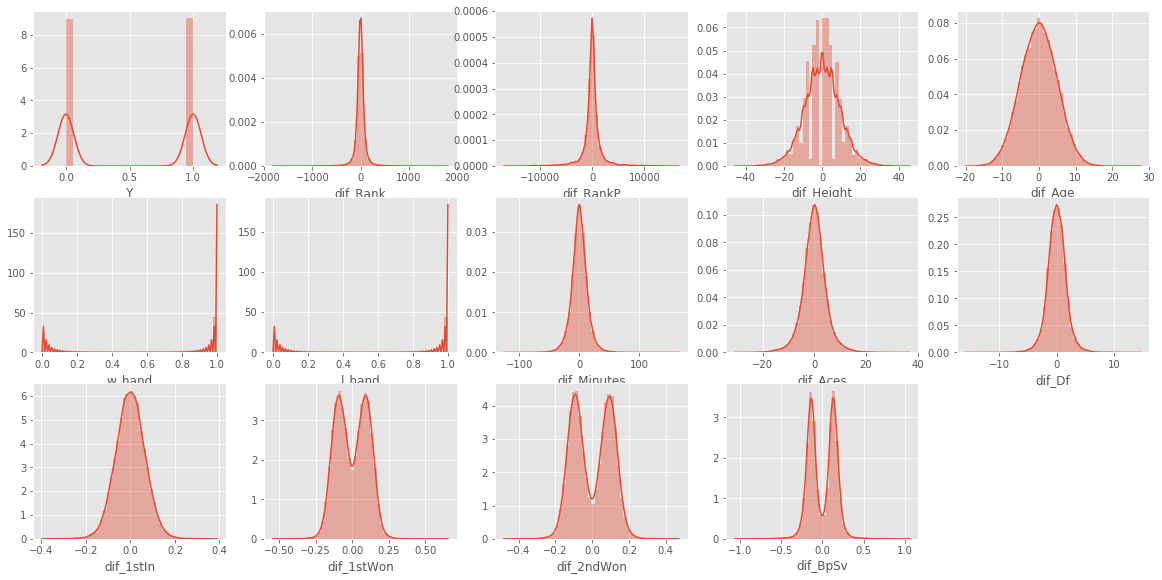

In [91]:
plt.figure(figsize=(20,20))
for index,col in enumerate(TennisDF.columns):
    plt.subplot(6,5,index+1)
    sns.distplot(TennisDF[col])

#### Antes de introducir las variables en el modelo vamos a estandarizarlas, pero no voy a estandarizar todas, evidentemente la variable Y no.

METODO 1:

Lo primero que voy a hacer es separar los data sets, en dos, una para los predictores y otro para el target.

In [92]:
TennisDF_X = TennisDF[['dif_Rank','dif_RankP','dif_Height','dif_Age','w_hand','l_hand','dif_Minutes','dif_Aces',
                        'dif_Df','dif_1stIn','dif_1stWon', 'dif_2ndWon','dif_BpSv']]

In [93]:
TennisDF_Y = TennisDF['Y']

In [94]:
TennisDFnorm_X = TennisDF_X.apply(lambda x: (x - np.mean(x)) / (np.std(x)))

In [95]:
TennisDFnorm_X.head()

,dif_Rank,dif_RankP,dif_Height,dif_Age,w_hand,l_hand,dif_Minutes,dif_Aces,dif_Df,dif_1stIn,dif_1stWon,dif_2ndWon,dif_BpSv
93,0.436851,-0.477989,-0.854257,1.924143,0.369130,-2.577533,0.727007,-2.573947,0.600292,0.938909,-0.963421,-0.852497,-0.351106
94,0.286042,-0.632345,-0.747777,1.620178,-2.709074,0.387968,-0.001799,-1.072912,-4.224875,1.158421,-0.403716,-0.235473,0.317695
95,-1.356093,0.271538,-0.747777,-0.026156,0.369130,-2.577533,0.216843,-0.107960,3.314449,-3.204942,-0.306466,-0.447034,-1.373000
96,-0.049087,0.059890,0.529990,-0.551797,0.369130,0.387968,-0.232588,-0.572567,0.700817,0.362018,1.049938,0.630732,0.877453
97,0.093343,-0.032913,-0.215374,1.060951,0.369130,0.387968,-1.034275,-0.072221,0.600292,-0.235036,-1.848608,-1.521504,0.266625


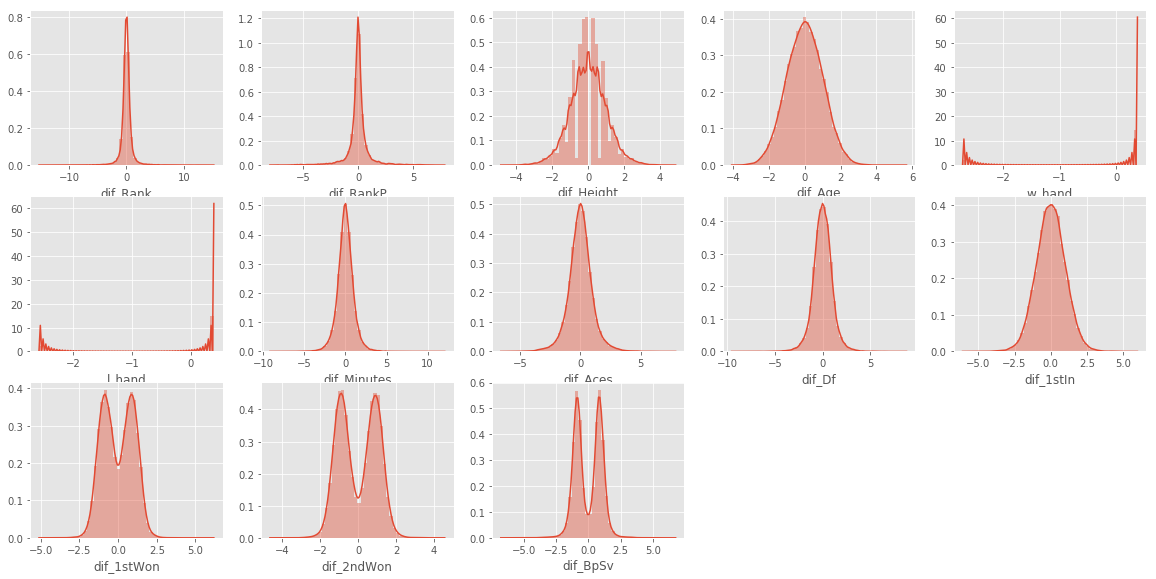

In [96]:
plt.figure(figsize=(20,20))
for index,col in enumerate(TennisDFnorm_X.columns):
    plt.subplot(6,5,index+1)
    sns.distplot(TennisDFnorm_X[col])

METODO 2:

In [331]:
X = (TennisDF[TennisDF.columns[1:13]]).values
X_norm = preprocessing.scale((TennisDF[TennisDF.columns[1:13]]).values)

In [335]:
X_norm

array([[ 0.43685063, -0.47798917, -0.85425723, ...,  0.93890897,
        -0.96342051, -0.85249722],
       [ 0.28604225, -0.63234532, -0.74777669, ...,  1.15842148,
        -0.40371577, -0.23547313],
       [-1.3560934 ,  0.2715378 , -0.74777669, ..., -3.20494151,
        -0.30646553, -0.44703355],
       ..., 
       [-0.02395275,  2.87996742,  1.06239247, ...,  0.58834394,
         1.00658294,  0.9582904 ],
       [ 0.02631671, -2.9012861 ,  0.63647032, ...,  0.38103044,
        -0.0848985 , -0.52447667],
       [-0.00719626,  0.19530669,  0.21054816, ..., -0.7399748 ,
         0.99850551,  1.03725861]])

In [336]:
y = TennisDF['Y']

El resultado del metod 1 y 2 coinciden

# 5. Modeling the data:

## 5.1. Base line model:

Vamos a buscar un escenario base para poder medir los progresos de nuestros modelos. Para este escenario utilizaré dif_Rank, algo que es sencillo de obtener y de interpretar. El indice de acierto debería mejorar el propio azar, aunque con un resultado muy bajo.

METODO 1:

In [97]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [98]:
X = TennisDFnorm_X[['dif_Rank']]
y = TennisDF['Y']
## AQUI ESTA EL PROBLEMA!! UN SOLO PARENTEISIS

In [99]:
logreg = linear_model.LogisticRegression()

In [100]:
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [101]:
logreg.score(X, y, sample_weight=None)

0.65324908516489766

Esto no es del todo correcto, debería separar el dataframe en un set para entrenar el modelo y otro para hacer el test. De esta forma obtendremos un modelo más realista.

In [102]:
X_train,X_test,y_train,y_test = train_test_split(X, y)

In [103]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [104]:
logreg.score(X_test, y_test, sample_weight=None)

0.65654545454545454

In [105]:
from sklearn.model_selection import cross_val_score

In [106]:
cross_val_score(logreg, X_test, y_test,cv=5) 

array([ 0.66197183,  0.66136364,  0.64      ,  0.65136364,  0.66848568])

In [144]:
#cross_val_score(logreg, X_test, y_test,cv=5).average

#### Antes de utilizar todas las variables en el target tengo que estar seguro de que ninguna de ellas está muy correlacionada o contiene el target. Tengo que analizar las que me generen dudas:

In [107]:
X = TennisDFnorm_X[['dif_2ndWon']]

In [108]:
X_train,X_test,y_train,y_test = train_test_split(X, y)
logreg.fit(X_train, y_train)
cross_val_score(logreg, X_test, y_test,cv=5) 

array([ 0.97181818,  0.97227273,  0.97454545,  0.96727273,  0.97045455])

In [109]:
X = TennisDFnorm_X[['dif_1stWon']]

In [110]:
X_train,X_test,y_train,y_test = train_test_split(X, y)
logreg.fit(X_train, y_train)
cross_val_score(logreg, X_test, y_test,cv=5) 

array([ 0.95136364,  0.94454545,  0.94272727,  0.95363636,  0.94727273])

In [111]:
X = TennisDFnorm_X[['dif_BpSv']]

In [112]:
X_train,X_test,y_train,y_test = train_test_split(X, y)
logreg.fit(X_train, y_train)
cross_val_score(logreg, X_test, y_test,cv=5) 

array([ 0.97137665,  0.9754657 ,  0.97590909,  0.97407913,  0.97089586])

Como habiamos previsto estas dos magnitudes combinan el total de puntos jugados, pasados a la primera, metidos a la primera y segunda. Evidentemente con toda esta información, simplemente sumando, podemos obtener el ganador. Tenemos que quitarlos del data set.

In [113]:
del TennisDFnorm_X['dif_1stWon']
del TennisDFnorm_X['dif_2ndWon']
del TennisDFnorm_X['dif_BpSv']

In [114]:
X = TennisDFnorm_X

In [115]:
X.head()

,dif_Rank,dif_RankP,dif_Height,dif_Age,w_hand,l_hand,dif_Minutes,dif_Aces,dif_Df,dif_1stIn
93,0.436851,-0.477989,-0.854257,1.924143,0.369130,-2.577533,0.727007,-2.573947,0.600292,0.938909
94,0.286042,-0.632345,-0.747777,1.620178,-2.709074,0.387968,-0.001799,-1.072912,-4.224875,1.158421
95,-1.356093,0.271538,-0.747777,-0.026156,0.369130,-2.577533,0.216843,-0.107960,3.314449,-3.204942
96,-0.049087,0.059890,0.529990,-0.551797,0.369130,0.387968,-0.232588,-0.572567,0.700817,0.362018
97,0.093343,-0.032913,-0.215374,1.060951,0.369130,0.387968,-1.034275,-0.072221,0.600292,-0.235036


## 5.2. Summarize of the models:

KNIME

## 5.3. Logistic Regresion:

In [116]:
from sklearn import linear_model

In [117]:
X = TennisDFnorm_X
y = TennisDF['Y']

In [118]:
logreg = linear_model.LogisticRegression()

In [119]:
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [120]:
logreg.score(X, y, sample_weight=None)

0.83951178489442457

In [121]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

/Users/NachoSJ/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     3548.
Date:                Wed, 08 Nov 2017   Prob (F-statistic):               0.00
Time:                        01:07:26   Log-Likelihood:                -18922.
No. Observations:               43997   AIC:                         3.787e+04
Df Residuals:                   43986   BIC:                         3.796e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5010      0.002    282.436      

#### Correlation matrix:

Visualizacion 1:

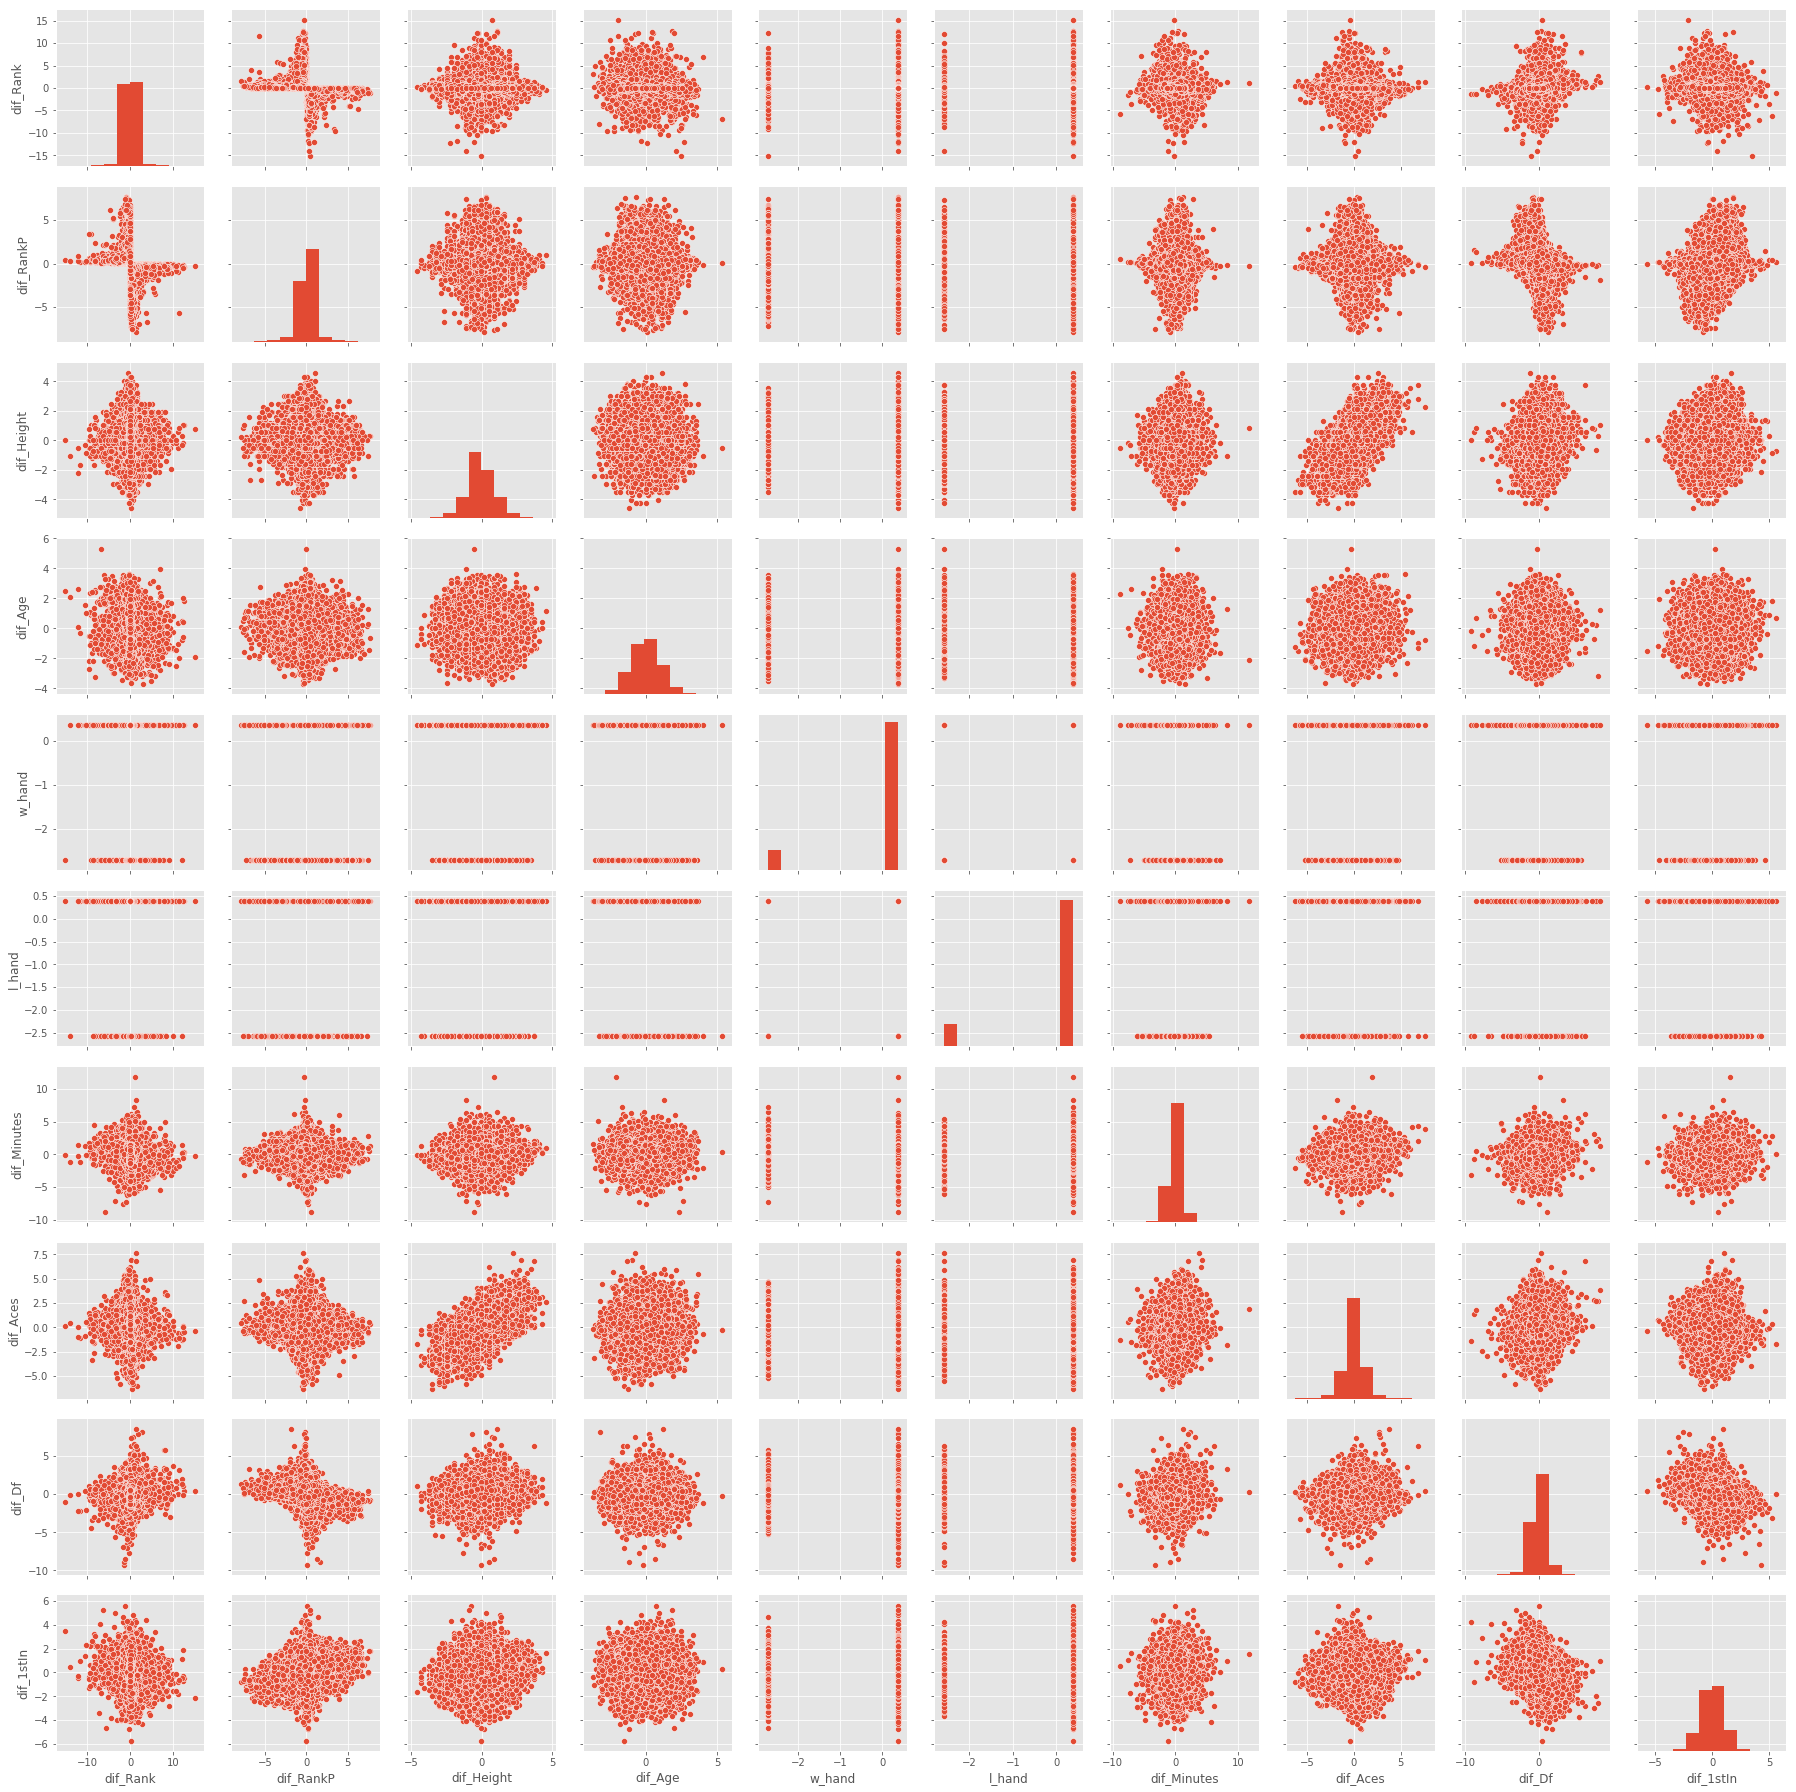

In [212]:
plt.figure(figsize=(20,20))
sns.pairplot(X)

La relación más fuerte entre variables parece que existe entre el número de Aces y la altura del jugador, lo cual parece evidente. La altura sin embargo no esta relacionada con las double fouls.

Visualizacion 2:

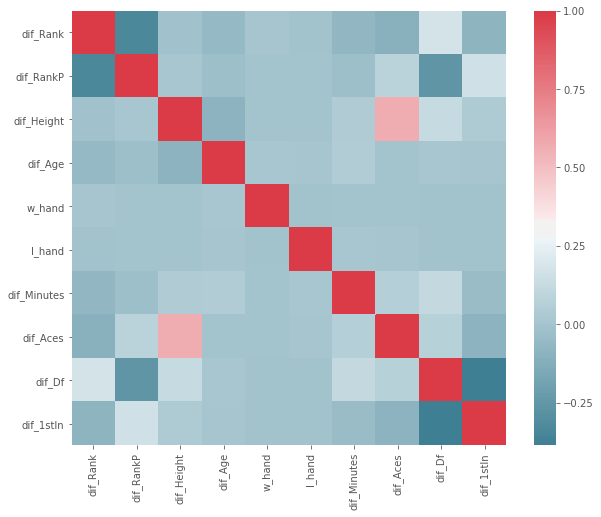

In [213]:
f, ax = plt.subplots(figsize=(10, 8))
corr = X.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Otra manera de visualizarlo:

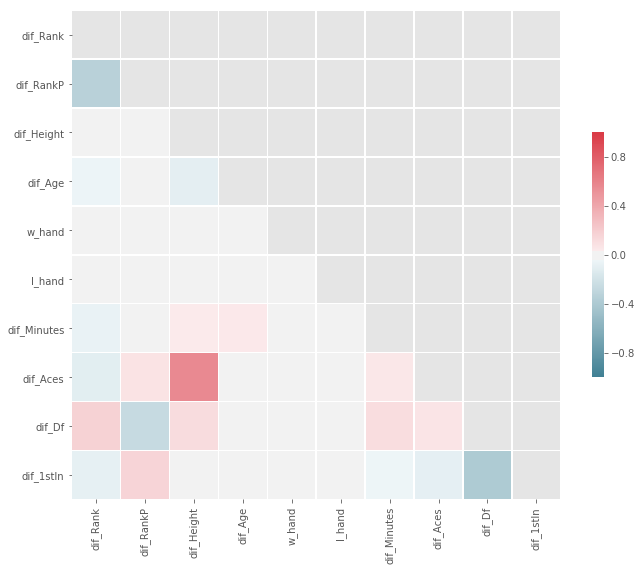

In [122]:
# Con seaborn
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


Gracias a esta matriz podemos ver ademas que también existe una realación fuerte entre el nuero de aces y las bolas de break salvadas. Evindemente solo puede haber un break cuando el jugador esta sacando.

#### Cofusion matrix:

In [123]:
from sklearn.metrics import confusion_matrix

In [124]:
mat = confusion_matrix(y_test,logreg.predict(X_test))
dfmat = pd.DataFrame(mat,index = ["Win","Lose"],
                  columns = ["Win","Lose"])

ValueError: X has 1 features per sample; expecting 10

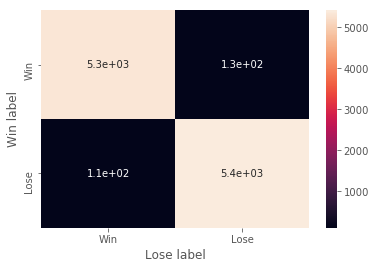

In [184]:
sns.heatmap(dfmat,annot=True)
plt.ylabel('Win label')
plt.xlabel('Lose label')

## 5.4.1. KNNeighbours:

In [129]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [218]:
X = TennisDFnorm_X
y = TennisDF['Y']

In [219]:
neigh = KNeighborsClassifier(n_neighbors = 5)

In [220]:
neigh.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Vamos a separa ed df en train-test:

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Vamos a ver la separación que ha hecho el sistema:

In [222]:
len(X_train)

32997

In [223]:
len(X_test)

11000

In [224]:
clf = KNeighborsClassifier(n_neighbors=5)

In [225]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Ahora vamos a valorar el accuracy del modelo:

In [226]:
accuracy_score(clf.predict(X_test), y_test)

0.8378181818181818

In [227]:
cross_val_score(clf,X,y,cv=30)

array([ 0.71370143,  0.77641445,  0.79209271,  0.80777096,  0.81390593,
        0.83367416,  0.82276755,  0.82685753,  0.83912747,  0.86366735,
        0.85207907,  0.85276074,  0.85753238,  0.86025903,  0.85412406,
        0.85685072,  0.84117246,  0.83503749,  0.85616905,  0.84730743,
        0.85957737,  0.84924966,  0.85402456,  0.85334243,  0.83492497,
        0.84174625,  0.85119454,  0.86279863,  0.81706485,  0.84027304])

El accuracy es muy similar al de la regresión lineal.

#### Vamos a completar el analisis del resultado: Vamos a mostrar la matriz de confusion y a mostrar el indice de
#### Precision = True Positives / Total positives identified
#### Recall = True positives / Total positives

In [228]:
from sklearn.metrics import confusion_matrix

In [229]:
mat = confusion_matrix(y_test,clf.predict(X_test))
dfmat = pd.DataFrame(mat,index = ["Win","Lose"],
                  columns = ["Win","Lose"])

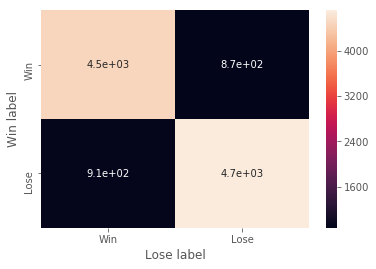

In [230]:
sns.heatmap(dfmat,annot=True)
plt.ylabel('Win label')
plt.xlabel('Lose label')

#### Ahora vamos a averiguar el número óptimo de K:

In [247]:
scores=[]
for i in range(1,25):
    clf = KNeighborsClassifier(n_neighbors=i)
    scores.append(cross_val_score(clf,X,y,cv=4))

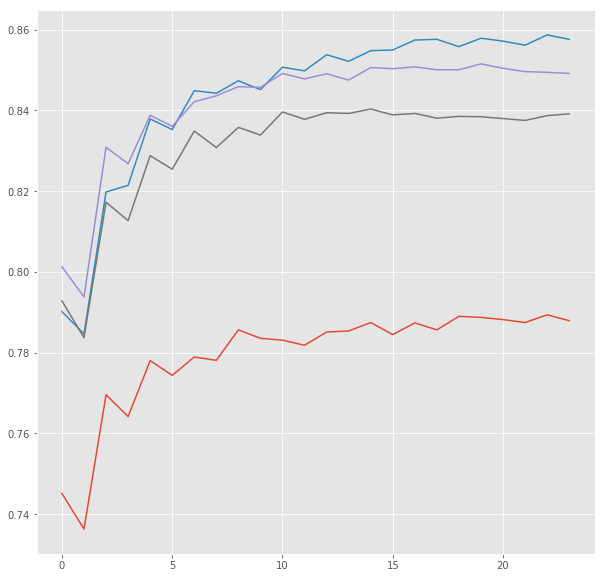

In [248]:
plt.figure(figsize=(10,10))
plt.plot(scores)
plt.show()

La mejora del accuracy es sustancial de 1 a 5. De 5 a 10 mejora en menor medida y apartir de aqui no se produce ninguna mejora más. El cálculo es muy lento, por lo que cuantos menos kneighbours utilicemos más rebajaremos el tiempo de proceso.

## 5.4.2. SVM:

In [125]:
from sklearn.svm import SVC

In [126]:
clf = SVC()
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
clf = SVC(kernel='linear')
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [130]:
accuracy_score(y_test,clf.predict(X_test))

0.8448181818181818

In [131]:
cross_val_score(clf,X,y,cv=5)

array([ 0.76982504,  0.8075    ,  0.84068182,  0.86795455,  0.86431818,
        0.85522727,  0.84541941,  0.83928165,  0.84951125,  0.85405774])

#### Vamos a dibujar la curva ROC:

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [ ]:
n_classes = 10

# Add noisy features to make the problem harder
#random_state = np.random.RandomState(0)
#n_samples, n_features = X.shape
# X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i] = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## 5.5. Naive Bayes Classifier:

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()

In [ ]:
y_pred = gnb.fit(X, y).predict(X)

In [ ]:
print("Number of mislabeled points out of a total %d points : %d"
...       % (X.shape[0],(y != y_pred).sum()))

## 5.6. Neuronal Network:

## 5.7. Decision Tree: